<center>
    <img src="https://www.formula1.com/content/dam/fom-website/manual/Misc/2022manual/2022SummerBreak/h2h/JPG-RGB-72-DPI-2022_Supershot_V_Formation_Final.jpg.transform/9col/image.jpg" width="720" height="720"/>
</center>

# Introduction

Welcome to my Exploratory Data Analysis (EDA) for the Formula 1 (1950 - 2022) dataset! Here, I will be taking a look at how the teams and drivers have evolved as the sport progresses. As with my other projects, I will come back to them to improve on my analysis as I learn more about data analytics and statistics in general! Do check out my Tableau visualisations and dashboard via the link in the previous page :)

## Reflection

These were the topics I investigated throughout this EDA:

- dominant drivers
- dominant constructors
- lap times evolution across tracks
- teams' success at each track through the years (points won after race)
- drivers' success at each track through the years (points won after race)
- drivers' success at each track through the years (positions gained from start to finish)

I didn't really perform any statistical analysis (correlation, spread, other aggregate functions apart from mean and sum) for this EDA as I was heavily interested and focused on the historical data that we are provided (which is why my topics of interest for this EDA had "... through the years ..." in them.

One thing I could improve on is the analysis for "drivers' success at each track through the years (positions gained from start to finish)". Instead of just including drivers who gained tons of places throughout the race, I should have just included drivers who made places AND won points. There were several instances in the olden era where drivers make a huge charge from the back of the grid and finished the race in top 10, but still missed out on points because of the points system that was implemented back then, which only saw the top 5 / 6 drivers win points.

And yes, I am aware that some of the topics did not have a proper visualisation of some sorts, although a table is there for viewing. That's because I was wanted to use Tableau for these visualisations. I felt it would look much nicer if presented that way. So keep on a look out for the Tableau viz!

# Considerations

### Points scoring system

In the time span the sport has been around, there have been multiple changes to the points scoring system to improve the championship title fights between teams.

#### 1950 - 1959:

![title](images/50-59.png)

#### 1960 - 1990:

![title](images/60-90.png)

#### 1991 - present:

![title](images/91-present.png)

#### Sprint qualifying

In 2021, the FIA introduced sprint qualifying (debuted at the Silverstone track, 2021). The idea is that teams will do their traditional time-based qualifying and this determines the starting grid for the sprint qualifying. In the sprint qualifying, drivers fight for their starting positions for the main event. You can imagine the sprint qualifying as a shorter race of the main event (~ 20 - 25 laps). This format allows for more racing action both on and off the track. However, this is only available at certain tracks (Emilia Romagna GP, Austrian GP, Brazilian GP for 2022).

![title](images/sprint.png)

#### Races stopped early due to unforseen conditions

![title](images/stopped_early.png)

### Why are these factors put into consideration of the analysis?

These will put context into our analysis as there will definitely be confusing results and we should be reminded that as the sport progresses, statistics will differ. With that being said, we will be grouping our datasets in a way that is fair for analysis. 

(Imagine grouping Juan Manuel Fangio with Lewis Hamilton, comparing for points earned in a season. That certainly does not make sense as the points scoring system was totally different for these two drivers!)

# Data Cleaning and Preparation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
circuits = pd.read_csv("circuits.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
sprint_results = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")

In [3]:
print(circuits.head(10))
print(circuits.info())
circuits.nunique()
circuits.isnull().sum()

   circuitId      circuitRef                            name      location  \
0          1     albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2          sepang    Sepang International Circuit  Kuala Lumpur   
2          3         bahrain   Bahrain International Circuit        Sakhir   
3          4       catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5        istanbul                   Istanbul Park      Istanbul   
5          6          monaco               Circuit de Monaco   Monte-Carlo   
6          7      villeneuve       Circuit Gilles Villeneuve      Montreal   
7          8     magny_cours   Circuit de Nevers Magny-Cours   Magny Cours   
8          9     silverstone             Silverstone Circuit   Silverstone   
9         10  hockenheimring                  Hockenheimring    Hockenheim   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  2

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

In [4]:
print(constructor_results.head(10))
print(constructor_results.info())
constructor_results.nunique()
constructor_results.isnull().sum()

   constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N
5                     6      18              6     1.0     \N
6                     7      18              7     0.0     \N
7                     8      18              8     0.0     \N
8                     9      18              9     0.0     \N
9                    10      18             10     0.0     \N
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12080 non-null  int64  
 1   raceId                12080 non-null  int64  
 2   c

constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

In [5]:
print(constructor_standings.head(10))
print(constructor_standings.info())
constructor_standings.nunique()
constructor_standings.isnull().sum()

   constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   
5                       6      18              6     1.0         6   
6                       7      19              1    24.0         1   
7                       8      19              2    19.0         2   
8                       9      19              3     9.0         4   
9                      10      19              4     6.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0  
5            6     0  
6            1     1  
7            2     0  
8            4     0  

constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

In [6]:
print(constructors.head(10))
print(constructors.info())
constructors.nunique()
constructors.isnull().sum()

   constructorId constructorRef         name nationality  \
0              1        mclaren      McLaren     British   
1              2     bmw_sauber   BMW Sauber      German   
2              3       williams     Williams     British   
3              4        renault      Renault      French   
4              5     toro_rosso   Toro Rosso     Italian   
5              6        ferrari      Ferrari     Italian   
6              7         toyota       Toyota    Japanese   
7              8    super_aguri  Super Aguri    Japanese   
8              9       red_bull     Red Bull    Austrian   
9             10    force_india  Force India      Indian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  
5      ht

constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

In [7]:
print(driver_standings.head(10))
print(driver_standings.info())
driver_standings.nunique()
driver_standings.isnull().sum()

   driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1            1     1
1                  2      18         2     8.0         2            2     0
2                  3      18         3     6.0         3            3     0
3                  4      18         4     5.0         4            4     0
4                  5      18         5     4.0         5            5     0
5                  6      18         6     3.0         6            6     0
6                  7      18         7     2.0         7            7     0
7                  8      18         8     1.0         8            8     0
8                  9      19         1    14.0         1            1     1
9                 10      19         2    11.0         3            3     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33686 entries, 0 to 33685
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ---

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

In [8]:
print(drivers.head(10))
print(drivers.info())
drivers.nunique()
drivers.isnull().sum()

   driverId   driverRef number code   forename     surname         dob  \
0         1    hamilton     44  HAM      Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI       Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS       Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO   Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV     Heikki  Kovalainen  1981-10-19   
5         6    nakajima     \N  NAK     Kazuki    Nakajima  1985-01-11   
6         7    bourdais     \N  BOU  Sébastien    Bourdais  1979-02-28   
7         8   raikkonen      7  RAI       Kimi   Räikkönen  1979-10-17   
8         9      kubica     88  KUB     Robert      Kubica  1984-12-07   
9        10       glock     \N  GLO       Timo       Glock  1982-03-18   

  nationality                                                url  
0     British        http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German         http://en.wikipedia.org/wiki/

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [9]:
print(lap_times.head(10))
print(lap_times.info())
lap_times.nunique()
lap_times.isnull().sum()

   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342
5     841        20    6         1  1:32.605         92605
6     841        20    7         1  1:32.502         92502
7     841        20    8         1  1:32.537         92537
8     841        20    9         1  1:33.240         93240
9     841        20   10         1  1:32.572         92572
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528785 entries, 0 to 528784
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        528785 non-null  int64 
 1   driverId      528785 non-null  int64 
 2   lap           528785 non-null  int64 
 3   position      528785 

raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64

In [10]:
lap_times["time"] = pd.to_datetime(lap_times["milliseconds"], unit="ms").dt.strftime('%M:%S.%f').str[:-3]
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,01:38.109,98109
1,841,20,2,1,01:33.006,93006
2,841,20,3,1,01:32.713,92713
3,841,20,4,1,01:32.803,92803
4,841,20,5,1,01:32.342,92342


In [11]:
print(qualifying.head(10))
print(qualifying.info())
qualifying.nunique()
qualifying.isnull().sum()

   qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   
5          6      18        15              7      11         6  1:26.427   
6          7      18         3              3       7         7  1:26.295   
7          8      18        14              9       9         8  1:26.381   
8          9      18        10              7      12         9  1:26.919   
9         10      18        20              5      15        10  1:26.702   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236  
5  1:26.

qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               151
q3               294
dtype: int64

In [12]:
qualifying.position.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [13]:
print(races.head(10))
print(races.info())
races.nunique()
races.isnull().sum()

   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   
5       6  2009      6          6      Monaco Grand Prix  2009-05-24   
6       7  2009      7          5     Turkish Grand Prix  2009-06-07   
7       8  2009      8          9     British Grand Prix  2009-06-21   
8       9  2009      9         20      German Grand Prix  2009-07-12   
9      10  2009     10         11   Hungarian Grand Prix  2009-07-26   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

In [14]:
print(results.head(10))
print(results.info())
results.nunique()
results.isnull().sum()

   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   
5         6      18         6              3      8    13        6   
6         7      18         7              5     14    17        7   
7         8      18         8              6      1    15        8   
8         9      18         9              2      4     2       \N   
9        10      18        10              7     12    18       \N   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2         

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [15]:
results.grid.unique()
results.position.dtypes

results.position = results.position.replace("\\N", "Retired")
results.position.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', 'Retired', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype=object)

In [16]:
print(seasons.head(10))
print(seasons.info())
seasons.nunique()
seasons.isnull().sum()

   year                                                url
0  2009  http://en.wikipedia.org/wiki/2009_Formula_One_...
1  2008  http://en.wikipedia.org/wiki/2008_Formula_One_...
2  2007  http://en.wikipedia.org/wiki/2007_Formula_One_...
3  2006  http://en.wikipedia.org/wiki/2006_Formula_One_...
4  2005  http://en.wikipedia.org/wiki/2005_Formula_One_...
5  2004  http://en.wikipedia.org/wiki/2004_Formula_One_...
6  2003  http://en.wikipedia.org/wiki/2003_Formula_One_...
7  2002  http://en.wikipedia.org/wiki/2002_Formula_One_...
8  2001  http://en.wikipedia.org/wiki/2001_Formula_One_...
9  2000  http://en.wikipedia.org/wiki/2000_Formula_One_...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    73 non-null     int64 
 1   url     73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
None


year    0
url     0
dtype: int64

In [17]:
print(sprint_results.head(10))
print(sprint_results.info())
sprint_results.nunique()
sprint_results.isnull().sum()

   resultId  raceId  driverId  constructorId  number  grid position  \
0         1    1061       830              9      33     2        1   
1         2    1061         1            131      44     1        2   
2         3    1061       822            131      77     3        3   
3         4    1061       844              6      16     4        4   
4         5    1061       846              1       4     6        5   
5         6    1061       817              1       3     7        6   
6         7    1061         4            214      14    11        7   
7         8    1061        20            117       5    10        8   
8         9    1061       847              3      63     8        9   
9        10    1061       839            214      31    13       10   

  positionText  positionOrder  points  laps       time milliseconds  \
0            1              1       3    17  25:38.426      1538426   
1            2              2       2    17     +1.430      1539856   
2    

resultId          0
raceId            0
driverId          0
constructorId     0
number            0
grid              0
position          0
positionText      0
positionOrder     0
points            0
laps              0
time              0
milliseconds      0
fastestLap        0
fastestLapTime    0
statusId          0
dtype: int64

In [18]:
print(status.head(10))
print(status.info())
status.nunique()
status.isnull().sum()

   statusId        status
0         1      Finished
1         2  Disqualified
2         3      Accident
3         4     Collision
4         5        Engine
5         6       Gearbox
6         7  Transmission
7         8        Clutch
8         9    Hydraulics
9        10    Electrical
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
None


statusId    0
status      0
dtype: int64

In [19]:
races_50_to_61 = races.loc[(races.year >= 1950) & (races.year < 1962)]

print(races_50_to_61.head(10))

     raceId  year  round  circuitId                      name        date  \
737     738  1961      1          6         Monaco Grand Prix  1961-05-14   
738     739  1961      2         39          Dutch Grand Prix  1961-05-22   
739     740  1961      3         13        Belgian Grand Prix  1961-06-18   
740     741  1961      4         55         French Grand Prix  1961-07-02   
741     742  1961      5         58        British Grand Prix  1961-07-15   
742     743  1961      6         20         German Grand Prix  1961-08-06   
743     744  1961      7         14        Italian Grand Prix  1961-09-10   
744     745  1961      8         46  United States Grand Prix  1961-10-08   
745     746  1960      1         25      Argentine Grand Prix  1960-02-07   
746     747  1960      2          6         Monaco Grand Prix  1960-05-29   

    time                                                url fp1_date fp1_time  \
737   \N  http://en.wikipedia.org/wiki/1961_Monaco_Grand...       \N   

In [20]:
races_62_to_90 = races.loc[(races.year >= 1962) & (races.year < 1991)]

print(races_62_to_90.head(10))

     raceId  year  round  circuitId                      name        date  \
320     321  1990      1         33  United States Grand Prix  1990-03-11   
321     322  1990      2         18      Brazilian Grand Prix  1990-03-25   
322     323  1990      3         21     San Marino Grand Prix  1990-05-13   
323     324  1990      4          6         Monaco Grand Prix  1990-05-27   
324     325  1990      5          7       Canadian Grand Prix  1990-06-10   
325     326  1990      6         32        Mexican Grand Prix  1990-06-24   
326     327  1990      7         34         French Grand Prix  1990-07-08   
327     328  1990      8          9        British Grand Prix  1990-07-15   
328     329  1990      9         10         German Grand Prix  1990-07-29   
329     330  1990     10         11      Hungarian Grand Prix  1990-08-12   

    time                                                url fp1_date fp1_time  \
320   \N  http://en.wikipedia.org/wiki/1990_United_State...       \N   

In [21]:
races_91_to_02 = races.loc[(races.year >= 1991) & (races.year < 2003)]

print(races_91_to_02.head(10))

     raceId  year  round  circuitId                   name        date time  \
123     124  2002      1          1  Australian Grand Prix  2002-03-03   \N   
124     125  2002      2          2   Malaysian Grand Prix  2002-03-17   \N   
125     126  2002      3         18   Brazilian Grand Prix  2002-03-31   \N   
126     127  2002      4         21  San Marino Grand Prix  2002-04-14   \N   
127     128  2002      5          4     Spanish Grand Prix  2002-04-28   \N   
128     129  2002      6         70    Austrian Grand Prix  2002-05-12   \N   
129     130  2002      7          6      Monaco Grand Prix  2002-05-26   \N   
130     131  2002      8          7    Canadian Grand Prix  2002-06-09   \N   
131     132  2002      9         20    European Grand Prix  2002-06-23   \N   
132     133  2002     10          9     British Grand Prix  2002-07-07   \N   

                                                   url fp1_date fp1_time  \
123  http://en.wikipedia.org/wiki/2002_Australian_G...

In [22]:
races_03_to_09 = races.loc[(races.year >= 2003) & (races.year < 2010)]

print(races_03_to_09.head(10))

   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   
5       6  2009      6          6      Monaco Grand Prix  2009-05-24   
6       7  2009      7          5     Turkish Grand Prix  2009-06-07   
7       8  2009      8          9     British Grand Prix  2009-06-21   
8       9  2009      9         20      German Grand Prix  2009-07-12   
9      10  2009     10         11   Hungarian Grand Prix  2009-07-26   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_

In [23]:
races_10_to_18 = races.loc[(races.year >= 2010) & (races.year < 2019)]

print(races_10_to_18.head(10))

     raceId  year  round  circuitId                   name        date  \
336     337  2010      1          3     Bahrain Grand Prix  2010-03-14   
337     338  2010      2          1  Australian Grand Prix  2010-03-28   
338     339  2010      3          2   Malaysian Grand Prix  2010-04-04   
339     340  2010      4         17     Chinese Grand Prix  2010-04-18   
340     341  2010      5          4     Spanish Grand Prix  2010-05-09   
341     342  2010      6          6      Monaco Grand Prix  2010-05-16   
342     343  2010      7          5     Turkish Grand Prix  2010-05-30   
343     344  2010      8          7    Canadian Grand Prix  2010-06-13   
344     345  2010      9         12    European Grand Prix  2010-06-27   
345     346  2010     10          9     British Grand Prix  2010-07-11   

         time                                                url fp1_date  \
336  12:00:00  http://en.wikipedia.org/wiki/2010_Bahrain_Gran...       \N   
337  06:00:00  http://en.wikipe

In [24]:
races_19_to_22 = races.loc[(races.year >= 2019) & (races.year < 2023)]

print(races_19_to_22.head(10))

      raceId  year  round  circuitId                   name        date  \
997     1010  2019      1          1  Australian Grand Prix  2019-03-17   
998     1011  2019      2          3     Bahrain Grand Prix  2019-03-31   
999     1012  2019      3         17     Chinese Grand Prix  2019-04-14   
1000    1013  2019      4         73  Azerbaijan Grand Prix  2019-04-28   
1001    1014  2019      5          4     Spanish Grand Prix  2019-05-12   
1002    1015  2019      6          6      Monaco Grand Prix  2019-05-26   
1003    1016  2019      7          7    Canadian Grand Prix  2019-06-09   
1004    1017  2019      8         34      French Grand Prix  2019-06-23   
1005    1018  2019      9         70    Austrian Grand Prix  2019-06-30   
1006    1019  2019     10          9     British Grand Prix  2019-07-14   

          time                                                url fp1_date  \
997   05:10:00  http://en.wikipedia.org/wiki/2019_Australian_G...       \N   
998   15:10:00  ht

In [25]:
races_50_to_61_merged = pd.merge(races_50_to_61,
                                results[["raceId", "driverId", "constructorId", "points"]],
                                on="raceId",
                                how="left")

races_50_to_61_merged = pd.merge(races_50_to_61_merged,
                                drivers[["driverId", "driverRef", "nationality"]],
                                on="driverId",
                                how="left")

races_50_to_61_merged = pd.merge(races_50_to_61_merged,
                                constructors[["constructorId", "constructorRef", "nationality"]],
                                on="constructorId",
                                how="left")

races_50_to_61_merged.rename(columns={"nationality_x": "driver_nationality", "nationality_y": "constructor_nationality",
                                     "constructorRef": "constructor_name", "driverRef": "driver_name"},
                             inplace=True)

races_50_to_61_merged = races_50_to_61_merged.drop(races_50_to_61_merged.columns[[6,7,8,9,10,11,12,13,14,15,16,17]], axis=1)

print(races_50_to_61_merged.head(10))

   raceId  year  round  circuitId               name        date  driverId  \
0     738  1961      1          6  Monaco Grand Prix  1961-05-14       475   
1     738  1961      1          6  Monaco Grand Prix  1961-05-14       386   
2     738  1961      1          6  Monaco Grand Prix  1961-05-14       403   
3     738  1961      1          6  Monaco Grand Prix  1961-05-14       476   
4     738  1961      1          6  Monaco Grand Prix  1961-05-14       364   
5     738  1961      1          6  Monaco Grand Prix  1961-05-14       360   
6     738  1961      1          6  Monaco Grand Prix  1961-05-14       427   
7     738  1961      1          6  Monaco Grand Prix  1961-05-14       477   
8     738  1961      1          6  Monaco Grand Prix  1961-05-14       478   
9     738  1961      1          6  Monaco Grand Prix  1961-05-14       373   

   constructorId  points  driver_name driver_nationality constructor_name  \
0            172     9.0         moss            British     lot

In [26]:
races_62_to_90_merged = pd.merge(races_62_to_90,
                                results[["raceId", "driverId", "constructorId", "points"]],
                                on="raceId",
                                how="left")

races_62_to_90_merged = pd.merge(races_62_to_90_merged,
                                drivers[["driverId", "driverRef", "nationality"]],
                                on="driverId",
                                how="left")

races_62_to_90_merged = pd.merge(races_62_to_90_merged,
                                constructors[["constructorId", "constructorRef", "nationality"]],
                                on="constructorId",
                                how="left")

races_62_to_90_merged.rename(columns={"nationality_x": "driver_nationality", "nationality_y": "constructor_nationality",
                                     "constructorRef": "constructor_name", "driverRef": "driver_name"},
                             inplace=True)

races_62_to_90_merged = races_62_to_90_merged.drop(races_62_to_90_merged.columns[[6,7,8,9,10,11,12,13,14,15,16,17]], axis=1)

print(races_62_to_90_merged.head(10))

   raceId  year  round  circuitId                      name        date  \
0     321  1990      1         33  United States Grand Prix  1990-03-11   
1     321  1990      1         33  United States Grand Prix  1990-03-11   
2     321  1990      1         33  United States Grand Prix  1990-03-11   
3     321  1990      1         33  United States Grand Prix  1990-03-11   
4     321  1990      1         33  United States Grand Prix  1990-03-11   
5     321  1990      1         33  United States Grand Prix  1990-03-11   
6     321  1990      1         33  United States Grand Prix  1990-03-11   
7     321  1990      1         33  United States Grand Prix  1990-03-11   
8     321  1990      1         33  United States Grand Prix  1990-03-11   
9     321  1990      1         33  United States Grand Prix  1990-03-11   

   driverId  constructorId  points      driver_name driver_nationality  \
0       102              1     9.0            senna          Brazilian   
1        55             25

In [27]:
races_91_to_02_merged = pd.merge(races_91_to_02,
                                results[["raceId", "driverId", "constructorId", "points"]],
                                on="raceId",
                                how="left")

races_91_to_02_merged = pd.merge(races_91_to_02_merged,
                                drivers[["driverId", "driverRef", "nationality"]],
                                on="driverId",
                                how="left")

races_91_to_02_merged = pd.merge(races_91_to_02_merged,
                                constructors[["constructorId", "constructorRef", "nationality"]],
                                on="constructorId",
                                how="left")

races_91_to_02_merged.rename(columns={"nationality_x": "driver_nationality", "nationality_y": "constructor_nationality",
                                     "constructorRef": "constructor_name", "driverRef": "driver_name"},
                             inplace=True)

races_91_to_02_merged = races_91_to_02_merged.drop(races_91_to_02_merged.columns[[6,7,8,9,10,11,12,13,14,15,16,17]], axis=1)

print(races_91_to_02_merged.head(10))

   raceId  year  round  circuitId                   name        date  \
0     124  2002      1          1  Australian Grand Prix  2002-03-03   
1     124  2002      1          1  Australian Grand Prix  2002-03-03   
2     124  2002      1          1  Australian Grand Prix  2002-03-03   
3     124  2002      1          1  Australian Grand Prix  2002-03-03   
4     124  2002      1          1  Australian Grand Prix  2002-03-03   
5     124  2002      1          1  Australian Grand Prix  2002-03-03   
6     124  2002      1          1  Australian Grand Prix  2002-03-03   
7     124  2002      1          1  Australian Grand Prix  2002-03-03   
8     124  2002      1          1  Australian Grand Prix  2002-03-03   
9     124  2002      1          1  Australian Grand Prix  2002-03-03   

   driverId  constructorId  points         driver_name driver_nationality  \
0        30              6    10.0  michael_schumacher             German   
1        31              3     6.0             montoy

In [28]:
races_03_to_09_merged = pd.merge(races_03_to_09,
                                results[["raceId", "driverId", "constructorId", "points"]],
                                on="raceId",
                                how="left")

races_03_to_09_merged = pd.merge(races_03_to_09_merged,
                                drivers[["driverId", "driverRef", "nationality"]],
                                on="driverId",
                                how="left")

races_03_to_09_merged = pd.merge(races_03_to_09_merged,
                                constructors[["constructorId", "constructorRef", "nationality"]],
                                on="constructorId",
                                how="left")

races_03_to_09_merged.rename(columns={"nationality_x": "driver_nationality", "nationality_y": "constructor_nationality",
                                     "constructorRef": "constructor_name", "driverRef": "driver_name"},
                             inplace=True)

races_03_to_09_merged = races_03_to_09_merged.drop(races_03_to_09_merged.columns[[6,7,8,9,10,11,12,13,14,15,16,17]], axis=1)

print(races_03_to_09_merged.head(10))

   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       1  2009      1          1  Australian Grand Prix  2009-03-29   
2       1  2009      1          1  Australian Grand Prix  2009-03-29   
3       1  2009      1          1  Australian Grand Prix  2009-03-29   
4       1  2009      1          1  Australian Grand Prix  2009-03-29   
5       1  2009      1          1  Australian Grand Prix  2009-03-29   
6       1  2009      1          1  Australian Grand Prix  2009-03-29   
7       1  2009      1          1  Australian Grand Prix  2009-03-29   
8       1  2009      1          1  Australian Grand Prix  2009-03-29   
9       1  2009      1          1  Australian Grand Prix  2009-03-29   

   driverId  constructorId  points  driver_name driver_nationality  \
0        18             23    10.0       button            British   
1        22             23     8.0  barrichello          Brazilian 

In [29]:
races_10_to_18_merged = pd.merge(races_10_to_18,
                                results[["raceId", "driverId", "constructorId", "points"]],
                                on="raceId",
                                how="left")

races_10_to_18_merged = pd.merge(races_10_to_18_merged,
                                drivers[["driverId", "driverRef", "nationality"]],
                                on="driverId",
                                how="left")

races_10_to_18_merged = pd.merge(races_10_to_18_merged,
                                constructors[["constructorId", "constructorRef", "nationality"]],
                                on="constructorId",
                                how="left")

races_10_to_18_merged.rename(columns={"nationality_x": "driver_nationality", "nationality_y": "constructor_nationality",
                                     "constructorRef": "constructor_name", "driverRef": "driver_name"},
                             inplace=True)

races_10_to_18_merged = races_10_to_18_merged.drop(races_10_to_18_merged.columns[[6,7,8,9,10,11,12,13,14,15,16,17]], axis=1)

print(races_10_to_18_merged.head(10))

   raceId  year  round  circuitId                name        date  driverId  \
0     337  2010      1          3  Bahrain Grand Prix  2010-03-14         4   
1     337  2010      1          3  Bahrain Grand Prix  2010-03-14        13   
2     337  2010      1          3  Bahrain Grand Prix  2010-03-14         1   
3     337  2010      1          3  Bahrain Grand Prix  2010-03-14        20   
4     337  2010      1          3  Bahrain Grand Prix  2010-03-14         3   
5     337  2010      1          3  Bahrain Grand Prix  2010-03-14        30   
6     337  2010      1          3  Bahrain Grand Prix  2010-03-14        18   
7     337  2010      1          3  Bahrain Grand Prix  2010-03-14        17   
8     337  2010      1          3  Bahrain Grand Prix  2010-03-14        24   
9     337  2010      1          3  Bahrain Grand Prix  2010-03-14        22   

   constructorId  points         driver_name driver_nationality  \
0              6    25.0              alonso            Spanish

In [30]:
races_19_to_22_merged = pd.merge(races_19_to_22,
                                results[["raceId", "driverId", "constructorId", "points"]],
                                on="raceId",
                                how="left")

races_19_to_22_merged = pd.merge(races_19_to_22_merged,
                                drivers[["driverId", "driverRef", "nationality"]],
                                on="driverId",
                                how="left")

races_19_to_22_merged = pd.merge(races_19_to_22_merged,
                                constructors[["constructorId", "constructorRef", "nationality"]],
                                on="constructorId",
                                how="left")

races_19_to_22_merged.rename(columns={"nationality_x": "driver_nationality", "nationality_y": "constructor_nationality",
                                     "constructorRef": "constructor_name", "driverRef": "driver_name"},
                             inplace=True)

races_19_to_22_merged = races_19_to_22_merged.drop(races_19_to_22_merged.columns[[6,7,8,9,10,11,12,13,14,15,16,17]], axis=1)

print(races_19_to_22_merged.head(10))

   raceId  year  round  circuitId                   name        date  \
0    1010  2019      1          1  Australian Grand Prix  2019-03-17   
1    1010  2019      1          1  Australian Grand Prix  2019-03-17   
2    1010  2019      1          1  Australian Grand Prix  2019-03-17   
3    1010  2019      1          1  Australian Grand Prix  2019-03-17   
4    1010  2019      1          1  Australian Grand Prix  2019-03-17   
5    1010  2019      1          1  Australian Grand Prix  2019-03-17   
6    1010  2019      1          1  Australian Grand Prix  2019-03-17   
7    1010  2019      1          1  Australian Grand Prix  2019-03-17   
8    1010  2019      1          1  Australian Grand Prix  2019-03-17   
9    1010  2019      1          1  Australian Grand Prix  2019-03-17   

   driverId  constructorId  points      driver_name driver_nationality  \
0     822.0          131.0    26.0           bottas            Finnish   
1       1.0          131.0    18.0         hamilton        

In [31]:
lap_times_merged = pd.merge(lap_times,
                              races[["raceId", "name", "year"]],
                              on="raceId",
                              how="left")

lap_times_merged = pd.merge(lap_times_merged,
                              drivers[["driverId", "driverRef", "nationality"]],
                              on="driverId",
                              how="left")

lap_times_merged.rename(columns={"driverRef": "driver_name"}, inplace=True)

print(lap_times_merged.head(10))
print(lap_times_merged.year.unique())

   raceId  driverId  lap  position       time  milliseconds  \
0     841        20    1         1  01:38.109         98109   
1     841        20    2         1  01:33.006         93006   
2     841        20    3         1  01:32.713         92713   
3     841        20    4         1  01:32.803         92803   
4     841        20    5         1  01:32.342         92342   
5     841        20    6         1  01:32.605         92605   
6     841        20    7         1  01:32.502         92502   
7     841        20    8         1  01:32.537         92537   
8     841        20    9         1  01:33.240         93240   
9     841        20   10         1  01:32.572         92572   

                    name  year driver_name nationality  
0  Australian Grand Prix  2011      vettel      German  
1  Australian Grand Prix  2011      vettel      German  
2  Australian Grand Prix  2011      vettel      German  
3  Australian Grand Prix  2011      vettel      German  
4  Australian Grand P

In [32]:
lap_times_merged.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2017,
       2018, 2019, 2020, 2021, 2022], dtype=int64)

In [33]:
laps_3l_engines = lap_times_merged.loc[(lap_times_merged.year >= 1996) & (lap_times_merged.year < 2000)]

print(laps_3l_engines.head(10))

        raceId  driverId  lap  position       time  milliseconds  \
113794     224        30    1         4  01:45.188        105188   
113795     224        30    2         3  01:37.680         97680   
113796     224        30    3         3  01:35.759         95759   
113797     224        30    4         3  01:35.467         95467   
113798     224        30    5         3  01:35.254         95254   
113799     224        30    6         3  01:35.117         95117   
113800     224        30    7         3  01:35.023         95023   
113801     224        30    8         3  01:35.407         95407   
113802     224        30    9         3  01:35.198         95198   
113803     224        30   10         3  01:35.088         95088   

                         name  year         driver_name nationality  
113794  Australian Grand Prix  1996  michael_schumacher      German  
113795  Australian Grand Prix  1996  michael_schumacher      German  
113796  Australian Grand Prix  1996  mich

In [34]:
laps_v10_engines = lap_times_merged.loc[(lap_times_merged.year >= 2000) & (lap_times_merged.year < 2006)]

print(laps_v10_engines.head(10))

        raceId  driverId  lap  position       time  milliseconds  \
177410     158        57    1         1  01:40.366        100366   
177411     158        57    2         1  01:34.181         94181   
177412     158        57    3         1  01:34.105         94105   
177413     158        57    4         1  01:33.886         93886   
177414     158        57    5         1  01:34.201         94201   
177415     158        57    6         1  01:33.759         93759   
177416     158        57    7         1  01:33.583         93583   
177417     158        57    8         1  02:07.485        127485   
177418     158        57    9         1  02:27.852        147852   
177419     158        57   10         1  02:44.270        164270   

                         name  year driver_name nationality  
177410  Australian Grand Prix  2000    hakkinen     Finnish  
177411  Australian Grand Prix  2000    hakkinen     Finnish  
177412  Australian Grand Prix  2000    hakkinen     Finnish  
177

In [35]:
laps_v8_engines = lap_times_merged.loc[(lap_times_merged.year >= 2006) & (lap_times_merged.year < 2009)]

print(laps_v8_engines.head(10))

        raceId  driverId  lap  position       time  milliseconds  \
283949      53         4    1         2  01:37.988         97988   
283950      53         4    2         2  01:34.733         94733   
283951      53         4    3         2  01:34.792         94792   
283952      53         4    4         2  01:34.678         94678   
283953      53         4    5         2  01:34.263         94263   
283954      53         4    6         2  01:34.587         94587   
283955      53         4    7         2  01:34.353         94353   
283956      53         4    8         2  01:34.703         94703   
283957      53         4    9         2  01:34.159         94159   
283958      53         4   10         2  01:33.560         93560   

                      name  year driver_name nationality  
283949  Bahrain Grand Prix  2006      alonso     Spanish  
283950  Bahrain Grand Prix  2006      alonso     Spanish  
283951  Bahrain Grand Prix  2006      alonso     Spanish  
283952  Bahrain

In [36]:
laps_v8_newregs_engines = lap_times_merged.loc[(lap_times_merged.year >= 2009) & (lap_times_merged.year < 2014)]

print(laps_v8_newregs_engines.head(10))

   raceId  driverId  lap  position       time  milliseconds  \
0     841        20    1         1  01:38.109         98109   
1     841        20    2         1  01:33.006         93006   
2     841        20    3         1  01:32.713         92713   
3     841        20    4         1  01:32.803         92803   
4     841        20    5         1  01:32.342         92342   
5     841        20    6         1  01:32.605         92605   
6     841        20    7         1  01:32.502         92502   
7     841        20    8         1  01:32.537         92537   
8     841        20    9         1  01:33.240         93240   
9     841        20   10         1  01:32.572         92572   

                    name  year driver_name nationality  
0  Australian Grand Prix  2011      vettel      German  
1  Australian Grand Prix  2011      vettel      German  
2  Australian Grand Prix  2011      vettel      German  
3  Australian Grand Prix  2011      vettel      German  
4  Australian Grand P

In [37]:
laps_v6_hybrid_engines = lap_times_merged.loc[(lap_times_merged.year >= 2014) & (lap_times_merged.year < 2023)]

print(laps_v6_hybrid_engines.head(10))

       raceId  driverId  lap  position       time  milliseconds  \
72130     900         3    1         1  01:42.038        102038   
72131     900         3    2         1  01:37.687         97687   
72132     900         3    3         1  01:35.765         95765   
72133     900         3    4         1  01:34.939         94939   
72134     900         3    5         1  01:35.438         95438   
72135     900         3    6         1  01:34.977         94977   
72136     900         3    7         1  01:35.417         95417   
72137     900         3    8         1  01:34.550         94550   
72138     900         3    9         1  01:34.217         94217   
72139     900         3   10         1  01:34.364         94364   

                        name  year driver_name nationality  
72130  Australian Grand Prix  2014     rosberg      German  
72131  Australian Grand Prix  2014     rosberg      German  
72132  Australian Grand Prix  2014     rosberg      German  
72133  Australian 

In [38]:
qualifying_races = pd.merge(qualifying,
                           races[["raceId", "name", "year"]],
                           on="raceId",
                           how="left")

qualifying_races = pd.merge(qualifying_races,
                           drivers[["driverId", "driverRef", "nationality"]],
                           on="driverId",
                           how="left")

qualifying_races = pd.merge(qualifying_races,
                           constructors[["constructorId", "constructorRef", "nationality"]],
                           on="constructorId",
                           how="left")


qualifying_races = pd.merge(qualifying_races,
                           results[["raceId", "driverId", "grid", "position", "points"]],
                           on=["raceId", "driverId"],
                           how = "inner")

qualifying_races.rename(columns={"position_x": "quali_position", "driverRef": "driver_name",
                                "nationality_x": "driver_nationality", "constructorRef": "constructor_name",
                                "nationality_y": "constructor_nationality", "position_y": "race_finish_position"}, inplace=True)

qualifying_races = qualifying_races.drop(qualifying_races.columns[[1,2,3,4,6,7,8]], axis=1)

print(qualifying_races.head(10))
print(qualifying_races.year.unique())

   qualifyId  quali_position                   name  year driver_name  \
0          1               1  Australian Grand Prix  2008    hamilton   
1          2               2  Australian Grand Prix  2008      kubica   
2          3               3  Australian Grand Prix  2008  kovalainen   
3          4               4  Australian Grand Prix  2008       massa   
4          5               5  Australian Grand Prix  2008    heidfeld   
5          6               6  Australian Grand Prix  2008      trulli   
6          7               7  Australian Grand Prix  2008     rosberg   
7          8               8  Australian Grand Prix  2008   coulthard   
8          9               9  Australian Grand Prix  2008       glock   
9         10              10  Australian Grand Prix  2008      vettel   

  driver_nationality constructor_name constructor_nationality  grid  \
0            British          mclaren                 British     1   
1             Polish       bmw_sauber                 

In [39]:
qualifying_races_94_99 = qualifying_races.loc[(qualifying_races.year >= 1994) & (qualifying_races.year < 2000)]

print(qualifying_races_94_99.head(10))

      qualifyId  quali_position                   name  year  \
1590       1591               1  Australian Grand Prix  1999   
1591       1592               2  Australian Grand Prix  1999   
1592       1593               3  Australian Grand Prix  1999   
1593       1594               4  Australian Grand Prix  1999   
1594       1595               5  Australian Grand Prix  1999   
1595       1596               6  Australian Grand Prix  1999   
1596       1597               7  Australian Grand Prix  1999   
1597       1598               8  Australian Grand Prix  1999   
1598       1599               9  Australian Grand Prix  1999   
1599       1600              10  Australian Grand Prix  1999   

             driver_name driver_nationality constructor_name  \
1590            hakkinen            Finnish          mclaren   
1591           coulthard            British          mclaren   
1592  michael_schumacher             German          ferrari   
1593         barrichello          Brazi

In [40]:
qualifying_races_00_05 = qualifying_races.loc[(qualifying_races.year >= 2000) & (qualifying_races.year < 2006)]

print(qualifying_races_00_05.head(10))

      qualifyId  quali_position                 name  year  \
1138       1139               1  European Grand Prix  2005   
1139       1140               2  European Grand Prix  2005   
1140       1141               3  European Grand Prix  2005   
1141       1142               4  European Grand Prix  2005   
1142       1143               5  European Grand Prix  2005   
1143       1144               6  European Grand Prix  2005   
1144       1145               7  European Grand Prix  2005   
1145       1146               8  European Grand Prix  2005   
1146       1147               9  European Grand Prix  2005   
1147       1148              10  European Grand Prix  2005   

             driver_name driver_nationality constructor_name  \
1138            heidfeld             German         williams   
1139           raikkonen            Finnish          mclaren   
1140              webber         Australian         williams   
1141              trulli            Italian           toyota 

In [41]:
qualifying_races_06_08 = qualifying_races.loc[(qualifying_races.year >= 2006) & (qualifying_races.year < 2009)]

print(qualifying_races_06_08.head(10))

   qualifyId  quali_position                   name  year driver_name  \
0          1               1  Australian Grand Prix  2008    hamilton   
1          2               2  Australian Grand Prix  2008      kubica   
2          3               3  Australian Grand Prix  2008  kovalainen   
3          4               4  Australian Grand Prix  2008       massa   
4          5               5  Australian Grand Prix  2008    heidfeld   
5          6               6  Australian Grand Prix  2008      trulli   
6          7               7  Australian Grand Prix  2008     rosberg   
7          8               8  Australian Grand Prix  2008   coulthard   
8          9               9  Australian Grand Prix  2008       glock   
9         10              10  Australian Grand Prix  2008      vettel   

  driver_nationality constructor_name constructor_nationality  grid  \
0            British          mclaren                 British     1   
1             Polish       bmw_sauber                 

In [42]:
qualifying_races_09_13 = qualifying_races.loc[(qualifying_races.year >= 2009) & (qualifying_races.year < 2014)]

print(qualifying_races_09_13.head(10))

      qualifyId  quali_position                   name  year  driver_name  \
2984       2986               1  Australian Grand Prix  2009       button   
2985       2987               2  Australian Grand Prix  2009  barrichello   
2986       2988               3  Australian Grand Prix  2009       vettel   
2987       2989               4  Australian Grand Prix  2009       kubica   
2988       2990               5  Australian Grand Prix  2009      rosberg   
2989       2991               6  Australian Grand Prix  2009        glock   
2990       2992               7  Australian Grand Prix  2009        massa   
2991       2993               8  Australian Grand Prix  2009       trulli   
2992       2994               9  Australian Grand Prix  2009    raikkonen   
2993       2995              10  Australian Grand Prix  2009       webber   

     driver_nationality constructor_name constructor_nationality  grid  \
2984            British            brawn                 British     1   
2985

In [43]:
qualifying_races_14_22 = qualifying_races.loc[(qualifying_races.year >= 2014) & (qualifying_races.year < 2023)]

print(qualifying_races_14_22.head(10))

      qualifyId  quali_position                   name  year      driver_name  \
5857       5860               1  Australian Grand Prix  2014         hamilton   
5858       5861               2  Australian Grand Prix  2014        ricciardo   
5859       5862               3  Australian Grand Prix  2014          rosberg   
5860       5863               4  Australian Grand Prix  2014  kevin_magnussen   
5861       5864               5  Australian Grand Prix  2014           alonso   
5862       5865               6  Australian Grand Prix  2014           vergne   
5863       5866               7  Australian Grand Prix  2014       hulkenberg   
5864       5867               8  Australian Grand Prix  2014            kvyat   
5865       5868               9  Australian Grand Prix  2014            massa   
5866       5869              10  Australian Grand Prix  2014           bottas   

     driver_nationality constructor_name constructor_nationality  grid  \
5857            British         me

# Analysis

## Dominant Drivers

The datasets are grouped according to the respective points system used in the era (refer to Considerations at the top of the notebook). This will be the same for the analysis on dominant constructors.

### 1950 - 1961

In [44]:
races_50_to_61_merged.head(25)

races_50_to_61_merged = races_50_to_61_merged.drop(races_50_to_61_merged.columns[[3, 6, 7]], axis=1)

races_50_to_61_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,738,1961,1,Monaco Grand Prix,1961-05-14,9.0,moss,British,lotus-climax,British
1,738,1961,1,Monaco Grand Prix,1961-05-14,6.0,ginther,American,ferrari,Italian
2,738,1961,1,Monaco Grand Prix,1961-05-14,4.0,phil_hill,American,ferrari,Italian
3,738,1961,1,Monaco Grand Prix,1961-05-14,3.0,trips,German,ferrari,Italian
4,738,1961,1,Monaco Grand Prix,1961-05-14,2.0,gurney,American,porsche,German
5,738,1961,1,Monaco Grand Prix,1961-05-14,1.0,mclaren,New Zealander,cooper-climax,British
6,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,trintignant,French,cooper-maserati,British
7,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,allison,British,lotus-climax,British
8,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,herrmann,German,porsche,German
9,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,clark,British,lotus-climax,British


In [45]:
driver_results_50_61 = races_50_to_61_merged.groupby(["year", "driver_name"], as_index=False).agg({"points": "sum"})

driver_results_50_61 = driver_results_50_61.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

driver_results_50_61

#driver_results_50_61.to_csv("working_datasets\\driver_results_50_61.csv")

,year,driver_name,points
1031,1961,phil_hill,38.00
947,1960,jack_brabham,43.00
857,1959,jack_brabham,34.00
761,1958,hawthorn,49.00
664,1957,fangio,46.00
581,1956,fangio,34.50
496,1955,fangio,41.00
403,1954,fangio,57.14
274,1953,ascari,46.50
168,1952,ascari,53.50


In [46]:
driver_results_50_61_count = driver_results_50_61.driver_name.value_counts().to_frame()
driver_results_50_61_count = driver_results_50_61_count.reset_index()
driver_results_50_61_count.columns = ["driver_name", "championship_count"]
#driver_results_50_61_count.to_csv("working_datasets\\driver_results_50_61_count.csv")

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\3068161426.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(driver_results_50_61_count.driver_name, rotation = 90)


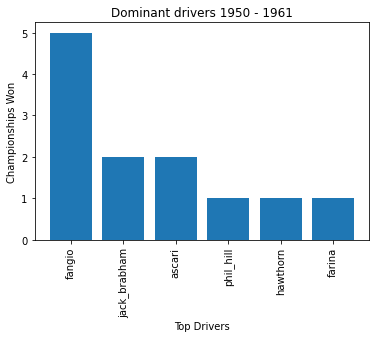

In [47]:
ax = plt.subplot()
plt.bar(driver_results_50_61_count.driver_name, driver_results_50_61_count.championship_count)
ax.set_xticklabels(driver_results_50_61_count.driver_name, rotation = 90)
ax.set_xlabel("Top Drivers")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant drivers 1950 - 1961")
plt.show()

Here, we can see that Juan Manuel Fangio dominates the 1950 - 1961 era with 5 championships won!

### 1962 - 1990

In [48]:
races_62_to_90_merged.head(25)

races_62_to_90_merged = races_62_to_90_merged.drop(races_62_to_90_merged.columns[[3, 6, 7]], axis=1)

races_62_to_90_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,321,1990,1,United States Grand Prix,1990-03-11,9.0,senna,Brazilian,mclaren,British
1,321,1990,1,United States Grand Prix,1990-03-11,6.0,alesi,French,tyrrell,British
2,321,1990,1,United States Grand Prix,1990-03-11,4.0,boutsen,Belgian,williams,British
3,321,1990,1,United States Grand Prix,1990-03-11,3.0,piquet,Brazilian,benetton,Italian
4,321,1990,1,United States Grand Prix,1990-03-11,2.0,modena,Italian,brabham,British
5,321,1990,1,United States Grand Prix,1990-03-11,1.0,satoru_nakajima,Japanese,tyrrell,British
6,321,1990,1,United States Grand Prix,1990-03-11,0.0,martini,Italian,minardi,Italian
7,321,1990,1,United States Grand Prix,1990-03-11,0.0,bernard,French,larrousse,French
8,321,1990,1,United States Grand Prix,1990-03-11,0.0,patrese,Italian,williams,British
9,321,1990,1,United States Grand Prix,1990-03-11,0.0,alboreto,Italian,arrows,British


In [49]:
driver_results_62_90 = races_62_to_90_merged.groupby(["year", "driver_name"], as_index=False).agg({"points": "sum"})

driver_results_62_90 = driver_results_62_90.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

#driver_results_62_90.to_csv("working_datasets\\driver_results_62_90.csv")

In [50]:
driver_results_62_90.driver_name.value_counts()

prost                 4
piquet                3
lauda                 3
stewart               3
hill                  3
emerson_fittipaldi    2
clark                 2
senna                 1
keke_rosberg          1
jones                 1
scheckter             1
mario_andretti        1
hunt                  1
rindt                 1
hulme                 1
jack_brabham          1
Name: driver_name, dtype: int64

In [51]:
driver_results_62_90_count = driver_results_62_90.driver_name.value_counts().to_frame()
driver_results_62_90_count = driver_results_62_90_count.reset_index()
driver_results_62_90_count.columns = ["driver_name", "championship_count"]
driver_results_62_90_count
#driver_results_62_90_count.to_csv("working_datasets\\driver_results_62_90_count.csv")

,driver_name,championship_count
0,prost,4
1,piquet,3
2,lauda,3
3,stewart,3
4,hill,3
5,emerson_fittipaldi,2
6,clark,2
7,senna,1
8,keke_rosberg,1
9,jones,1


C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\3837693696.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(driver_results_62_90_count.driver_name, rotation = 90)


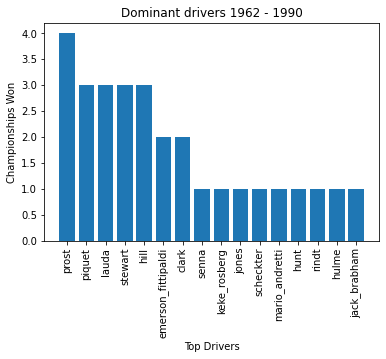

In [52]:
ax = plt.subplot()
plt.bar(driver_results_62_90_count.driver_name, driver_results_62_90_count.championship_count)
ax.set_xticklabels(driver_results_62_90_count.driver_name, rotation = 90)
ax.set_xlabel("Top Drivers")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant drivers 1962 - 1990")
plt.show()

Alain Prost leads the pack with 4 championships won in the 1962 - 1990 era, followed closely behind by several drivers with 3 championships won, with the likes of Nelson Piquet, Niki Lauda Jacklie Stewart and Damon Hill.

### 1991 - 2002

In [53]:
races_91_to_02_merged.head(25)

races_91_to_02_merged = races_91_to_02_merged.drop(races_91_to_02_merged.columns[[3, 6, 7]], axis=1)

races_91_to_02_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,124,2002,1,Australian Grand Prix,2002-03-03,10.0,michael_schumacher,German,ferrari,Italian
1,124,2002,1,Australian Grand Prix,2002-03-03,6.0,montoya,Colombian,williams,British
2,124,2002,1,Australian Grand Prix,2002-03-03,4.0,raikkonen,Finnish,mclaren,British
3,124,2002,1,Australian Grand Prix,2002-03-03,3.0,irvine,British,jaguar,British
4,124,2002,1,Australian Grand Prix,2002-03-03,2.0,webber,Australian,minardi,Italian
5,124,2002,1,Australian Grand Prix,2002-03-03,1.0,salo,Finnish,toyota,Japanese
6,124,2002,1,Australian Grand Prix,2002-03-03,0.0,yoong,Malaysian,minardi,Italian
7,124,2002,1,Australian Grand Prix,2002-03-03,0.0,rosa,Spanish,jaguar,British
8,124,2002,1,Australian Grand Prix,2002-03-03,0.0,coulthard,British,mclaren,British
9,124,2002,1,Australian Grand Prix,2002-03-03,0.0,villeneuve,Canadian,bar,British


In [54]:
driver_results_91_02 = races_91_to_02_merged.groupby(["year", "driver_name"], as_index=False).agg({"points": "sum"})

driver_results_91_02 = driver_results_91_02.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

driver_results_91_02
#driver_results_91_02.to_csv("working_datasets\\driver_results_91_02.csv")

,year,driver_name,points
353,2002,michael_schumacher,144.0
331,2001,michael_schumacher,123.0
307,2000,michael_schumacher,108.0
278,1999,hakkinen,76.0
253,1998,hakkinen,100.0
244,1997,villeneuve,81.0
200,1996,damon_hill,97.0
182,1995,michael_schumacher,102.0
146,1994,michael_schumacher,92.0
106,1993,prost,99.0


In [55]:
driver_results_91_02.driver_name.value_counts()

michael_schumacher    5
hakkinen              2
villeneuve            1
damon_hill            1
prost                 1
mansell               1
senna                 1
Name: driver_name, dtype: int64

In [56]:
driver_results_91_02_count = driver_results_91_02.driver_name.value_counts().to_frame()
driver_results_91_02_count = driver_results_91_02_count.reset_index()
driver_results_91_02_count.columns = ["driver_name", "championship_count"]
driver_results_91_02_count
#driver_results_91_02_count.to_csv("working_datasets\\driver_results_91_02_count.csv")

,driver_name,championship_count
0,michael_schumacher,5
1,hakkinen,2
2,villeneuve,1
3,damon_hill,1
4,prost,1
5,mansell,1
6,senna,1


C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\43623046.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(driver_results_91_02_count.driver_name, rotation = 90)


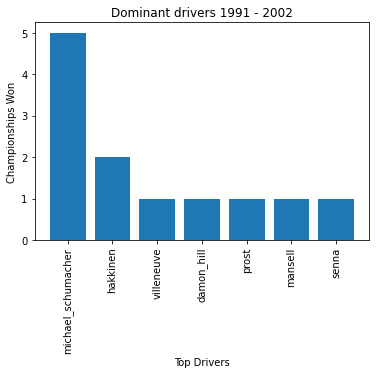

In [57]:
ax = plt.subplot()
plt.bar(driver_results_91_02_count.driver_name, driver_results_91_02_count.championship_count)
ax.set_xticklabels(driver_results_91_02_count.driver_name, rotation = 90)
ax.set_xlabel("Top Drivers")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant drivers 1991 - 2002")
plt.show()

Michael Schumacher dominates the 1991 - 2002 era with 5 championships under his belt!

### 2003 - 2009

In [58]:
races_03_to_09_merged.head(25)

races_03_to_09_merged = races_03_to_09_merged.drop(races_03_to_09_merged.columns[[3, 6, 7]], axis=1)

races_03_to_09_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1,2009,1,Australian Grand Prix,2009-03-29,10.0,button,British,brawn,British
1,1,2009,1,Australian Grand Prix,2009-03-29,8.0,barrichello,Brazilian,brawn,British
2,1,2009,1,Australian Grand Prix,2009-03-29,6.0,trulli,Italian,toyota,Japanese
3,1,2009,1,Australian Grand Prix,2009-03-29,5.0,glock,German,toyota,Japanese
4,1,2009,1,Australian Grand Prix,2009-03-29,4.0,alonso,Spanish,renault,French
5,1,2009,1,Australian Grand Prix,2009-03-29,3.0,rosberg,German,williams,British
6,1,2009,1,Australian Grand Prix,2009-03-29,2.0,buemi,Swiss,toro_rosso,Italian
7,1,2009,1,Australian Grand Prix,2009-03-29,1.0,bourdais,French,toro_rosso,Italian
8,1,2009,1,Australian Grand Prix,2009-03-29,0.0,sutil,German,force_india,Indian
9,1,2009,1,Australian Grand Prix,2009-03-29,0.0,heidfeld,German,bmw_sauber,German


In [59]:
driver_results_03_09 = races_03_to_09_merged.groupby(["year", "driver_name"], as_index=False).agg({"points": "sum"})

driver_results_03_09 = driver_results_03_09.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

driver_results_03_09

#driver_results_03_09.to_csv("working_datasets\\driver_results_03_09.csv")

,year,driver_name,points
157,2009,button,95.0
137,2008,hamilton,98.0
118,2007,raikkonen,110.0
77,2006,alonso,134.0
50,2005,alonso,133.0
37,2004,michael_schumacher,148.0
12,2003,michael_schumacher,93.0


In [60]:
driver_results_03_09.driver_name.value_counts()

alonso                2
michael_schumacher    2
button                1
hamilton              1
raikkonen             1
Name: driver_name, dtype: int64

In [61]:
driver_results_03_09_count = driver_results_03_09.driver_name.value_counts().to_frame()
driver_results_03_09_count = driver_results_03_09_count.reset_index()
driver_results_03_09_count.columns = ["driver_name", "championship_count"]
driver_results_03_09_count
#driver_results_03_09_count.to_csv("working_datasets\\driver_results_03_09_count.csv")

,driver_name,championship_count
0,alonso,2
1,michael_schumacher,2
2,button,1
3,hamilton,1
4,raikkonen,1


C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\2204938922.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(driver_results_03_09_count.driver_name, rotation = 90)


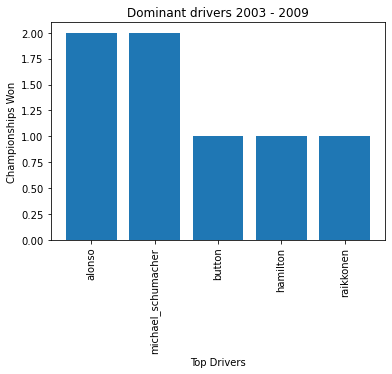

In [62]:
ax = plt.subplot()
plt.bar(driver_results_03_09_count.driver_name, driver_results_03_09_count.championship_count)
ax.set_xticklabels(driver_results_03_09_count.driver_name, rotation = 90)
ax.set_xlabel("Top Drivers")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant drivers 2003 - 2009")
plt.show()

This era had a variety of champions, not one driver was able to win more than two in a row!

### 2010 - 2018

In [63]:
races_10_to_18_merged.head(25)

races_10_to_18_merged = races_10_to_18_merged.drop(races_10_to_18_merged.columns[[3, 6, 7]], axis=1)

races_10_to_18_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,337,2010,1,Bahrain Grand Prix,2010-03-14,25.0,alonso,Spanish,ferrari,Italian
1,337,2010,1,Bahrain Grand Prix,2010-03-14,18.0,massa,Brazilian,ferrari,Italian
2,337,2010,1,Bahrain Grand Prix,2010-03-14,15.0,hamilton,British,mclaren,British
3,337,2010,1,Bahrain Grand Prix,2010-03-14,12.0,vettel,German,red_bull,Austrian
4,337,2010,1,Bahrain Grand Prix,2010-03-14,10.0,rosberg,German,mercedes,German
5,337,2010,1,Bahrain Grand Prix,2010-03-14,8.0,michael_schumacher,German,mercedes,German
6,337,2010,1,Bahrain Grand Prix,2010-03-14,6.0,button,British,mclaren,British
7,337,2010,1,Bahrain Grand Prix,2010-03-14,4.0,webber,Australian,red_bull,Austrian
8,337,2010,1,Bahrain Grand Prix,2010-03-14,2.0,liuzzi,Italian,force_india,Indian
9,337,2010,1,Bahrain Grand Prix,2010-03-14,1.0,barrichello,Brazilian,williams,British


In [64]:
driver_results_10_18 = races_10_to_18_merged.groupby(["year", "driver_name"], as_index=False).agg({"points": "sum"})

driver_results_10_18 = driver_results_10_18.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

driver_results_10_18
#driver_results_10_18.to_csv("working_datasets\\driver_results_10_18.csv")

,year,driver_name,points
204,2018,hamilton,408.0
181,2017,hamilton,363.0
168,2016,rosberg,385.0
132,2015,hamilton,381.0
110,2014,hamilton,384.0
101,2013,vettel,397.0
78,2012,vettel,281.0
53,2011,vettel,392.0
24,2010,vettel,256.0


In [65]:
driver_results_10_18.driver_name.value_counts()

hamilton    4
vettel      4
rosberg     1
Name: driver_name, dtype: int64

In [66]:
driver_results_10_18_count = driver_results_10_18.driver_name.value_counts().to_frame()
driver_results_10_18_count = driver_results_10_18_count.reset_index()
driver_results_10_18_count.columns = ["driver_name", "championship_count"]
driver_results_10_18_count
#driver_results_10_18_count.to_csv("working_datasets\\driver_results_10_18_count.csv")

,driver_name,championship_count
0,hamilton,4
1,vettel,4
2,rosberg,1


C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\2024509212.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(driver_results_10_18_count.driver_name, rotation = 90)


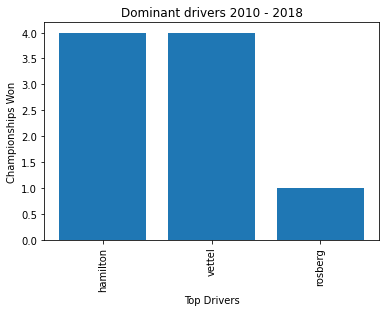

In [67]:
ax = plt.subplot()
plt.bar(driver_results_10_18_count.driver_name, driver_results_10_18_count.championship_count)
ax.set_xticklabels(driver_results_10_18_count.driver_name, rotation = 90)
ax.set_xlabel("Top Drivers")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant drivers 2010 - 2018")
plt.show()

During the 2010 - 2018 era, Sebastian certainly dominated the 2010 - 2013 period, winning 4 championships in a row with Red Bull! Afterwards, it's the Mercedes AMG drivers who won the subsequent championships (including Nico Rosberg who beat his own teammate, Lewis Hamilton in the same machinery).

### 2019 - 2022

In [68]:
races_19_to_22_merged.head(25)

races_19_to_22_merged = races_19_to_22_merged.drop(races_19_to_22_merged.columns[[3, 6, 7]], axis=1)

races_19_to_22_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1010,2019,1,Australian Grand Prix,2019-03-17,26.0,bottas,Finnish,mercedes,German
1,1010,2019,1,Australian Grand Prix,2019-03-17,18.0,hamilton,British,mercedes,German
2,1010,2019,1,Australian Grand Prix,2019-03-17,15.0,max_verstappen,Dutch,red_bull,Austrian
3,1010,2019,1,Australian Grand Prix,2019-03-17,12.0,vettel,German,ferrari,Italian
4,1010,2019,1,Australian Grand Prix,2019-03-17,10.0,leclerc,Monegasque,ferrari,Italian
5,1010,2019,1,Australian Grand Prix,2019-03-17,8.0,kevin_magnussen,Danish,haas,American
6,1010,2019,1,Australian Grand Prix,2019-03-17,6.0,hulkenberg,German,renault,French
7,1010,2019,1,Australian Grand Prix,2019-03-17,4.0,raikkonen,Finnish,alfa,Swiss
8,1010,2019,1,Australian Grand Prix,2019-03-17,2.0,stroll,Canadian,racing_point,British
9,1010,2019,1,Australian Grand Prix,2019-03-17,1.0,kvyat,Russian,toro_rosso,Italian


In [69]:
driver_results_19_22 = races_19_to_22_merged.groupby(["year", "driver_name"], as_index=False).agg({"points": "sum"})

driver_results_19_22 = driver_results_19_22.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

driver_results_19_22
#driver_results_19_22.to_csv("working_datasets\\driver_results_19_22.csv")

,year,driver_name,points
73,2022,max_verstappen,242.0
51,2021,max_verstappen,388.5
26,2020,hamilton,347.0
5,2019,hamilton,413.0


In [70]:
driver_results_19_22.driver_name.value_counts()

max_verstappen    2
hamilton          2
Name: driver_name, dtype: int64

In [71]:
driver_results_19_22_count = driver_results_19_22.driver_name.value_counts().to_frame()
driver_results_19_22_count = driver_results_19_22_count.reset_index()
driver_results_19_22_count.columns = ["driver_name", "championship_count"]
driver_results_19_22_count
#driver_results_19_22_count.to_csv("working_datasets\\driver_results_19_22_count.csv")

,driver_name,championship_count
0,max_verstappen,2
1,hamilton,2


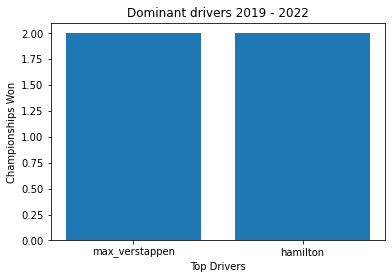

In [72]:
ax = plt.subplot()
plt.bar(driver_results_19_22_count.driver_name, driver_results_19_22_count.championship_count)
ax.set_xlabel("Top Drivers")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant drivers 2019 - 2022")
plt.show()

Lewis Hamilton took over the 2019 and 2020 season, overpowering the field with his Mercedes machinery. However, the 2021 season introduced drama, controversy and trials as Max Verstappen challenges Lewis for the championship. This rivalry went on to the last race of the season, both drivers tied for points. Literally every F1 fans' dream; a championship decider on the last race of the season. You know what? https://www.youtube.com/watch?v=ARiMh6hNj_s <- go watch this video, it literally encapsulates the hectic season that 2021 was!

How about the 2022 season? Well, the FIA have released new regulations (https://www.skysports.com/f1/news/12433/12524402/formula-1-in-2022-explaining-the-new-rules-and-car-changes-as-teams-prepare-for-first-launches#:~:text=The%20key%20changes%20are%3A,generated%20from%20under%20the%20car) to improve the quality of racing between drivers. Now, this does not equate to teams being brought much closer together in terms of race wins and points. Quality of racing refers to how closely the cars can follow one another (slipstreaming -> car gets closer to car ahead -> overtaking opportunities). In terms of how close together teams will be in car performance? Well, that's up to the teams themselves.

And with that being said, Max Verstappen and Red Bull are sitting comfortably at the top in both the Driver's and Constructor's World Championships for 2022 respectively (coming in to the Singapore Grand Prix).

## Moving on to dominant constructors from...

### 1950 - 1961

In [73]:
races_50_to_61_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,738,1961,1,Monaco Grand Prix,1961-05-14,9.0,moss,British,lotus-climax,British
1,738,1961,1,Monaco Grand Prix,1961-05-14,6.0,ginther,American,ferrari,Italian
2,738,1961,1,Monaco Grand Prix,1961-05-14,4.0,phil_hill,American,ferrari,Italian
3,738,1961,1,Monaco Grand Prix,1961-05-14,3.0,trips,German,ferrari,Italian
4,738,1961,1,Monaco Grand Prix,1961-05-14,2.0,gurney,American,porsche,German
5,738,1961,1,Monaco Grand Prix,1961-05-14,1.0,mclaren,New Zealander,cooper-climax,British
6,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,trintignant,French,cooper-maserati,British
7,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,allison,British,lotus-climax,British
8,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,herrmann,German,porsche,German
9,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,clark,British,lotus-climax,British


In [74]:
cons_results_50_61 = races_50_to_61_merged.groupby(["year", "constructor_name"], as_index=False).agg({"points": "sum"})

cons_results_50_61 = cons_results_50_61.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

cons_results_50_61
#cons_results_50_61.to_csv("working_datasets\\cons_results_50_61.csv")

,year,constructor_name,points
233,1961,ferrari,99.00
207,1960,cooper-climax,102.00
181,1959,cooper-climax,97.50
166,1958,ferrari,93.00
156,1957,maserati,78.00
137,1956,ferrari,83.00
124,1955,mercedes,79.00
97,1954,ferrari,80.28
80,1953,ferrari,122.50
58,1952,ferrari,120.50


In [75]:
cons_results_50_61.constructor_name.value_counts()

ferrari          7
cooper-climax    2
maserati         1
mercedes         1
alfa             1
Name: constructor_name, dtype: int64

In [76]:
cons_results_50_61_count = cons_results_50_61.constructor_name.value_counts().to_frame()
cons_results_50_61_count = cons_results_50_61_count.reset_index()
cons_results_50_61_count.columns = ["constructor_name", "championship_count"]
cons_results_50_61_count
#cons_results_50_61_count.to_csv("working_datasets\\cons_results_50_61_count.csv")

,constructor_name,championship_count
0,ferrari,7
1,cooper-climax,2
2,maserati,1
3,mercedes,1
4,alfa,1


C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\1140861701.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cons_results_50_61_count.constructor_name, rotation = 90)


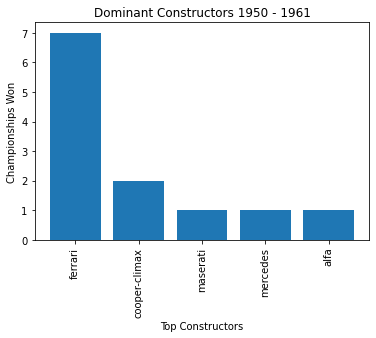

In [77]:
ax = plt.subplot()
plt.bar(cons_results_50_61_count.constructor_name, cons_results_50_61_count.championship_count)
ax.set_xticklabels(cons_results_50_61_count.constructor_name, rotation = 90)
ax.set_xlabel("Top Constructors")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant Constructors 1950 - 1961")
plt.show()

### 1962 - 1990

In [78]:
races_62_to_90_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,321,1990,1,United States Grand Prix,1990-03-11,9.0,senna,Brazilian,mclaren,British
1,321,1990,1,United States Grand Prix,1990-03-11,6.0,alesi,French,tyrrell,British
2,321,1990,1,United States Grand Prix,1990-03-11,4.0,boutsen,Belgian,williams,British
3,321,1990,1,United States Grand Prix,1990-03-11,3.0,piquet,Brazilian,benetton,Italian
4,321,1990,1,United States Grand Prix,1990-03-11,2.0,modena,Italian,brabham,British
5,321,1990,1,United States Grand Prix,1990-03-11,1.0,satoru_nakajima,Japanese,tyrrell,British
6,321,1990,1,United States Grand Prix,1990-03-11,0.0,martini,Italian,minardi,Italian
7,321,1990,1,United States Grand Prix,1990-03-11,0.0,bernard,French,larrousse,French
8,321,1990,1,United States Grand Prix,1990-03-11,0.0,patrese,Italian,williams,British
9,321,1990,1,United States Grand Prix,1990-03-11,0.0,alboreto,Italian,arrows,British


In [79]:
cons_results_62_90 = races_62_to_90_merged.groupby(["year", "constructor_name"], as_index=False).agg({"points": "sum"})

cons_results_62_90 = cons_results_62_90.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

cons_results_62_90
#cons_results_62_90.to_csv("working_datasets\\cons_results_62_90.csv")

,year,constructor_name,points
478,1990,mclaren,121.0
457,1989,mclaren,141.0
438,1988,mclaren,199.0
426,1987,williams,137.0
410,1986,williams,141.0
387,1985,mclaren,90.0
372,1984,mclaren,143.5
354,1983,ferrari,89.0
338,1982,ferrari,74.0
332,1981,williams,95.0


In [80]:
cons_results_62_90.constructor_name.value_counts()

ferrari          8
mclaren          6
williams         4
brm              3
tyrrell          2
brabham-repco    2
team_lotus       1
matra-ford       1
lotus-ford       1
lotus-climax     1
Name: constructor_name, dtype: int64

In [81]:
cons_results_62_90_count = cons_results_62_90.constructor_name.value_counts().to_frame()
cons_results_62_90_count = cons_results_62_90_count.reset_index()
cons_results_62_90_count.columns = ["constructor_name", "championship_count"]
cons_results_62_90_count
#cons_results_62_90_count.to_csv("working_datasets\\cons_results_62_90_count.csv")

,constructor_name,championship_count
0,ferrari,8
1,mclaren,6
2,williams,4
3,brm,3
4,tyrrell,2
5,brabham-repco,2
6,team_lotus,1
7,matra-ford,1
8,lotus-ford,1
9,lotus-climax,1


C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\2514203510.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cons_results_62_90_count.constructor_name, rotation = 90)


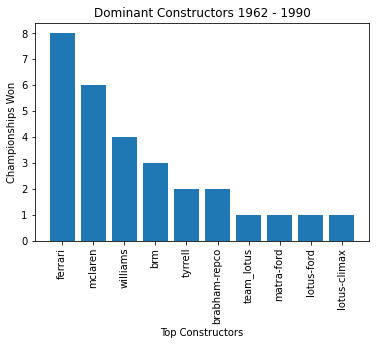

In [82]:
ax = plt.subplot()
plt.bar(cons_results_62_90_count.constructor_name, cons_results_62_90_count.championship_count)
ax.set_xticklabels(cons_results_62_90_count.constructor_name, rotation = 90)
ax.set_xlabel("Top Constructors")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant Constructors 1962 - 1990")
plt.show()

### 1991 - 2002

In [83]:
races_91_to_02_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,124,2002,1,Australian Grand Prix,2002-03-03,10.0,michael_schumacher,German,ferrari,Italian
1,124,2002,1,Australian Grand Prix,2002-03-03,6.0,montoya,Colombian,williams,British
2,124,2002,1,Australian Grand Prix,2002-03-03,4.0,raikkonen,Finnish,mclaren,British
3,124,2002,1,Australian Grand Prix,2002-03-03,3.0,irvine,British,jaguar,British
4,124,2002,1,Australian Grand Prix,2002-03-03,2.0,webber,Australian,minardi,Italian
5,124,2002,1,Australian Grand Prix,2002-03-03,1.0,salo,Finnish,toyota,Japanese
6,124,2002,1,Australian Grand Prix,2002-03-03,0.0,yoong,Malaysian,minardi,Italian
7,124,2002,1,Australian Grand Prix,2002-03-03,0.0,rosa,Spanish,jaguar,British
8,124,2002,1,Australian Grand Prix,2002-03-03,0.0,coulthard,British,mclaren,British
9,124,2002,1,Australian Grand Prix,2002-03-03,0.0,villeneuve,Canadian,bar,British


In [84]:
cons_results_91_02 = races_91_to_02_merged.groupby(["year", "constructor_name"], as_index=False).agg({"points": "sum"})

cons_results_91_02 = cons_results_91_02.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

cons_results_91_02
#cons_results_91_02.to_csv("working_datasets\\cons_results_91_02.csv")

,year,constructor_name,points
144,2002,ferrari,221.0
134,2001,ferrari,179.0
123,2000,ferrari,170.0
112,1999,ferrari,128.0
102,1998,mclaren,156.0
97,1997,williams,123.0
85,1996,williams,175.0
62,1995,benetton,147.0
61,1994,williams,118.0
47,1993,williams,168.0


In [85]:
cons_results_91_02.constructor_name.value_counts()

williams    5
ferrari     4
mclaren     2
benetton    1
Name: constructor_name, dtype: int64

In [86]:
cons_results_91_02_count = cons_results_91_02.constructor_name.value_counts().to_frame()
cons_results_91_02_count = cons_results_91_02_count.reset_index()
cons_results_91_02_count.columns = ["constructor_name", "championship_count"]
cons_results_91_02_count
#cons_results_91_02_count.to_csv("working_datasets\\cons_results_91_02_count.csv")

,constructor_name,championship_count
0,williams,5
1,ferrari,4
2,mclaren,2
3,benetton,1


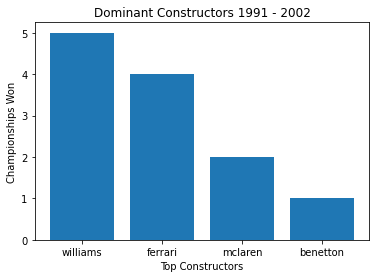

In [87]:
ax = plt.subplot()
plt.bar(cons_results_91_02_count.constructor_name, cons_results_91_02_count.championship_count)
ax.set_xlabel("Top Constructors")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant Constructors 1991 - 2002")
plt.show()

### 2003 - 2009

In [88]:
races_03_to_09_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1,2009,1,Australian Grand Prix,2009-03-29,10.0,button,British,brawn,British
1,1,2009,1,Australian Grand Prix,2009-03-29,8.0,barrichello,Brazilian,brawn,British
2,1,2009,1,Australian Grand Prix,2009-03-29,6.0,trulli,Italian,toyota,Japanese
3,1,2009,1,Australian Grand Prix,2009-03-29,5.0,glock,German,toyota,Japanese
4,1,2009,1,Australian Grand Prix,2009-03-29,4.0,alonso,Spanish,renault,French
5,1,2009,1,Australian Grand Prix,2009-03-29,3.0,rosberg,German,williams,British
6,1,2009,1,Australian Grand Prix,2009-03-29,2.0,buemi,Swiss,toro_rosso,Italian
7,1,2009,1,Australian Grand Prix,2009-03-29,1.0,bourdais,French,toro_rosso,Italian
8,1,2009,1,Australian Grand Prix,2009-03-29,0.0,sutil,German,force_india,Indian
9,1,2009,1,Australian Grand Prix,2009-03-29,0.0,heidfeld,German,bmw_sauber,German


In [89]:
cons_results_03_09 = races_03_to_09_merged.groupby(["year", "constructor_name"], as_index=False).agg({"points": "sum"})

cons_results_03_09 = cons_results_03_09.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

cons_results_03_09
#cons_results_03_09.to_csv("working_datasets\\cons_results_03_09.csv")

,year,constructor_name,points
65,2009,brawn,172.0
54,2008,ferrari,172.0
45,2007,mclaren,218.0
36,2006,renault,206.0
26,2005,renault,191.0
11,2004,ferrari,262.0
1,2003,ferrari,158.0


In [90]:
cons_results_03_09.constructor_name.value_counts()

ferrari    3
renault    2
brawn      1
mclaren    1
Name: constructor_name, dtype: int64

In [91]:
cons_results_03_09_count = cons_results_03_09.constructor_name.value_counts().to_frame()
cons_results_03_09_count = cons_results_03_09_count.reset_index()
cons_results_03_09_count.columns = ["constructor_name", "championship_count"]
cons_results_03_09_count
#cons_results_03_09_count.to_csv("working_datasets\\cons_results_03_09_count.csv")

,constructor_name,championship_count
0,ferrari,3
1,renault,2
2,brawn,1
3,mclaren,1


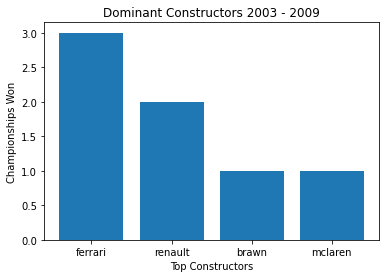

In [92]:
ax = plt.subplot()
plt.bar(cons_results_03_09_count.constructor_name, cons_results_03_09_count.championship_count)
ax.set_xlabel("Top Constructors")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant Constructors 2003 - 2009")
plt.show()

### 2010 - 2018

In [93]:
races_10_to_18_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,337,2010,1,Bahrain Grand Prix,2010-03-14,25.0,alonso,Spanish,ferrari,Italian
1,337,2010,1,Bahrain Grand Prix,2010-03-14,18.0,massa,Brazilian,ferrari,Italian
2,337,2010,1,Bahrain Grand Prix,2010-03-14,15.0,hamilton,British,mclaren,British
3,337,2010,1,Bahrain Grand Prix,2010-03-14,12.0,vettel,German,red_bull,Austrian
4,337,2010,1,Bahrain Grand Prix,2010-03-14,10.0,rosberg,German,mercedes,German
5,337,2010,1,Bahrain Grand Prix,2010-03-14,8.0,michael_schumacher,German,mercedes,German
6,337,2010,1,Bahrain Grand Prix,2010-03-14,6.0,button,British,mclaren,British
7,337,2010,1,Bahrain Grand Prix,2010-03-14,4.0,webber,Australian,red_bull,Austrian
8,337,2010,1,Bahrain Grand Prix,2010-03-14,2.0,liuzzi,Italian,force_india,Indian
9,337,2010,1,Bahrain Grand Prix,2010-03-14,1.0,barrichello,Brazilian,williams,British


In [94]:
cons_results_10_18 = races_10_to_18_merged.groupby(["year", "constructor_name"], as_index=False).agg({"points": "sum"})

cons_results_10_18 = cons_results_10_18.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

cons_results_10_18
#cons_results_10_18.to_csv("working_datasets\\cons_results_10_18.csv")

,year,constructor_name,points
93,2018,mercedes,655.0
83,2017,mercedes,668.0
73,2016,mercedes,765.0
63,2015,mercedes,703.0
53,2014,mercedes,701.0
43,2013,red_bull,596.0
32,2012,red_bull,460.0
18,2011,red_bull,650.0
6,2010,red_bull,498.0


In [95]:
cons_results_10_18.constructor_name.value_counts()

mercedes    5
red_bull    4
Name: constructor_name, dtype: int64

In [96]:
cons_results_10_18_count = cons_results_10_18.constructor_name.value_counts().to_frame()
cons_results_10_18_count = cons_results_10_18_count.reset_index()
cons_results_10_18_count.columns = ["constructor_name", "championship_count"]
cons_results_10_18_count
#cons_results_10_18_count.to_csv("working_datasets\\cons_results_10_18_count.csv")

,constructor_name,championship_count
0,mercedes,5
1,red_bull,4


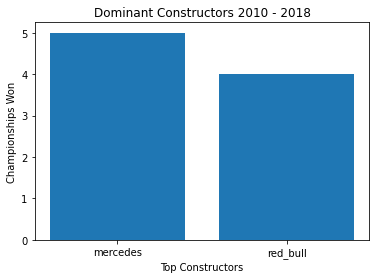

In [97]:
ax = plt.subplot()
plt.bar(cons_results_10_18_count.constructor_name, cons_results_10_18_count.championship_count)
ax.set_xlabel("Top Constructors")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant Constructors 2010 - 2018")
plt.show()

### 2019 - 2022

In [98]:
races_19_to_22_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1010,2019,1,Australian Grand Prix,2019-03-17,26.0,bottas,Finnish,mercedes,German
1,1010,2019,1,Australian Grand Prix,2019-03-17,18.0,hamilton,British,mercedes,German
2,1010,2019,1,Australian Grand Prix,2019-03-17,15.0,max_verstappen,Dutch,red_bull,Austrian
3,1010,2019,1,Australian Grand Prix,2019-03-17,12.0,vettel,German,ferrari,Italian
4,1010,2019,1,Australian Grand Prix,2019-03-17,10.0,leclerc,Monegasque,ferrari,Italian
5,1010,2019,1,Australian Grand Prix,2019-03-17,8.0,kevin_magnussen,Danish,haas,American
6,1010,2019,1,Australian Grand Prix,2019-03-17,6.0,hulkenberg,German,renault,French
7,1010,2019,1,Australian Grand Prix,2019-03-17,4.0,raikkonen,Finnish,alfa,Swiss
8,1010,2019,1,Australian Grand Prix,2019-03-17,2.0,stroll,Canadian,racing_point,British
9,1010,2019,1,Australian Grand Prix,2019-03-17,1.0,kvyat,Russian,toro_rosso,Italian


In [99]:
cons_results_19_22 = races_19_to_22_merged.groupby(["year", "constructor_name"], as_index=False).agg({"points": "sum"})

cons_results_19_22 = cons_results_19_22.sort_values(by=["year", "points"], ascending=False).groupby("year").head(1)

pd.set_option('display.max_rows', None)

cons_results_19_22
#cons_results_19_22.to_csv("working_datasets\\cons_results_19_22.csv")

,year,constructor_name,points
38,2022,red_bull,405.0
27,2021,mercedes,604.5
15,2020,mercedes,573.0
4,2019,mercedes,739.0


In [100]:
cons_results_19_22.constructor_name.value_counts()

mercedes    3
red_bull    1
Name: constructor_name, dtype: int64

In [101]:
cons_results_19_22_count = cons_results_19_22.constructor_name.value_counts().to_frame()
cons_results_19_22_count = cons_results_19_22_count.reset_index()
cons_results_19_22_count.columns = ["constructor_name", "championship_count"]
cons_results_19_22_count
#cons_results_19_22_count.to_csv("working_datasets\\cons_results_19_22_count.csv")

,constructor_name,championship_count
0,mercedes,3
1,red_bull,1


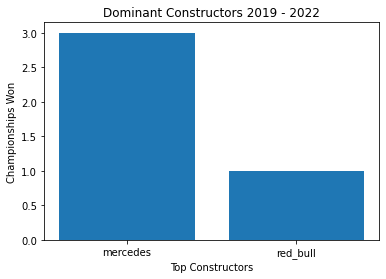

In [102]:
ax = plt.subplot()
plt.bar(cons_results_19_22_count.constructor_name, cons_results_19_22_count.championship_count)
ax.set_xlabel("Top Constructors")
ax.set_ylabel("Championships Won")
ax.set_title("Dominant Constructors 2019 - 2022")
plt.show()

## Now, let's investigate lap times across different tracks as cars evolve through the years

We'll be using lap times from these tracks:
- Autodromo Nazionale di Monza (Italian GP)
- Circuit de Monaco (Monaco GP)
- Circuit de Spa-Francorchamps (Belgian GP)
- Silverstone Circuit (British GP)

### Why use these tracks?

These tracks have been around since the beginning of F1, with the first ever World Championship Grand Prix held at Silverstone! It would be interesting to see how cars have evolved through the lap times they produce in these tracks. However, the configurations of these tracks have certainly gone through changes over the years. We have to keep this in mind as we proceed with our analysis here. (EDIT: unfortunately the earliest records of lap times available in this data set is 1996! I guess we won't be able to see lap times of the olden F1 cars...)

### Comparison

We'll be comparing lap times between cars of different eras (eras, with reference to engine types/configurations)

### Considerations

We should keep in mind that weather also plays a part in races! A wet race (rain) will produce way slower lap times compared to a normal, dry race.

### 3-litre engines

In [103]:
laps_3l_engines.head()

,raceId,driverId,lap,position,time,milliseconds,name,year,driver_name,nationality
113794,224,30,1,4,01:45.188,105188,Australian Grand Prix,1996,michael_schumacher,German
113795,224,30,2,3,01:37.680,97680,Australian Grand Prix,1996,michael_schumacher,German
113796,224,30,3,3,01:35.759,95759,Australian Grand Prix,1996,michael_schumacher,German
113797,224,30,4,3,01:35.467,95467,Australian Grand Prix,1996,michael_schumacher,German
113798,224,30,5,3,01:35.254,95254,Australian Grand Prix,1996,michael_schumacher,German


In [104]:
laps_3l_engines_historic = laps_3l_engines.loc[(laps_3l_engines.name == "Italian Grand Prix") | (laps_3l_engines.name == "Monaco Grand Prix")
                                     | (laps_3l_engines.name == "Belgian Grand Prix") | (laps_3l_engines.name == "British Grand Prix")]

In [105]:
avg_times_tracks_yearly_3l = laps_3l_engines_historic.groupby(["year", "name"], as_index=False).agg({"milliseconds": "mean"})
avg_times_tracks_yearly_3l["time_minutes"] = pd.to_datetime(avg_times_tracks_yearly_3l["milliseconds"], unit="ms").dt.strftime('%M:%S.%f').str[:-3]

avg_times_tracks_yearly_3l = avg_times_tracks_yearly_3l.sort_values(by=["name", "year"], ascending=[False, True])

avg_times_tracks_yearly_3l
#avg_times_tracks_yearly_3l.to_csv("working_datasets\\avg_times_tracks_yearly_3l.csv")

,year,name,milliseconds,time_minutes
3,1996,Monaco Grand Prix,99796.089514,01:39.796
7,1997,Monaco Grand Prix,119601.466926,01:59.601
11,1998,Monaco Grand Prix,87478.994053,01:27.478
15,1999,Monaco Grand Prix,86060.880570,01:26.060
2,1996,Italian Grand Prix,90259.416268,01:30.259
6,1997,Italian Grand Prix,88592.763713,01:28.592
10,1998,Italian Grand Prix,90119.742009,01:30.119
14,1999,Italian Grand Prix,88680.921085,01:28.680
1,1996,British Grand Prix,93658.725173,01:33.658
5,1997,British Grand Prix,91178.666992,01:31.178


### V10 Engines

In [106]:
laps_v10_engines.head()

,raceId,driverId,lap,position,time,milliseconds,name,year,driver_name,nationality
177410,158,57,1,1,01:40.366,100366,Australian Grand Prix,2000,hakkinen,Finnish
177411,158,57,2,1,01:34.181,94181,Australian Grand Prix,2000,hakkinen,Finnish
177412,158,57,3,1,01:34.105,94105,Australian Grand Prix,2000,hakkinen,Finnish
177413,158,57,4,1,01:33.886,93886,Australian Grand Prix,2000,hakkinen,Finnish
177414,158,57,5,1,01:34.201,94201,Australian Grand Prix,2000,hakkinen,Finnish


In [107]:
laps_v10_engines_historic = laps_v10_engines.loc[(laps_v10_engines.name == "Italian Grand Prix") | (laps_v10_engines.name == "Monaco Grand Prix")
                                     | (laps_v10_engines.name == "Belgian Grand Prix") | (laps_v10_engines.name == "British Grand Prix")]

In [108]:
avg_times_tracks_yearly_v10 = laps_v10_engines_historic.groupby(["year", "name"], as_index=False).agg({"milliseconds": "mean"})
avg_times_tracks_yearly_v10["time_minutes"] = pd.to_datetime(avg_times_tracks_yearly_v10["milliseconds"], unit="ms").dt.strftime('%M:%S.%f').str[:-3]

avg_times_tracks_yearly_v10 = avg_times_tracks_yearly_v10.sort_values(by=["name", "year"], ascending=[False, True])

avg_times_tracks_yearly_v10
#avg_times_tracks_yearly_v10.to_csv("working_datasets\\avg_times_tracks_yearly_v10.csv")

,year,name,milliseconds,time_minutes
3,2000,Monaco Grand Prix,85511.054434,01:25.511
7,2001,Monaco Grand Prix,85217.383186,01:25.217
11,2002,Monaco Grand Prix,83429.296378,01:23.429
14,2003,Monaco Grand Prix,80484.473043,01:20.484
18,2004,Monaco Grand Prix,85515.922652,01:25.515
22,2005,Monaco Grand Prix,82586.505376,01:22.586
2,2000,Italian Grand Prix,103042.183857,01:43.042
6,2001,Italian Grand Prix,89274.423963,01:29.274
10,2002,Italian Grand Prix,88326.605425,01:28.326
13,2003,Italian Grand Prix,86474.211562,01:26.474


### V8 Engines

In [109]:
laps_v8_engines.head()

,raceId,driverId,lap,position,time,milliseconds,name,year,driver_name,nationality
283949,53,4,1,2,01:37.988,97988,Bahrain Grand Prix,2006,alonso,Spanish
283950,53,4,2,2,01:34.733,94733,Bahrain Grand Prix,2006,alonso,Spanish
283951,53,4,3,2,01:34.792,94792,Bahrain Grand Prix,2006,alonso,Spanish
283952,53,4,4,2,01:34.678,94678,Bahrain Grand Prix,2006,alonso,Spanish
283953,53,4,5,2,01:34.263,94263,Bahrain Grand Prix,2006,alonso,Spanish


In [110]:
laps_v8_engines_historic = laps_v8_engines.loc[(laps_v8_engines.name == "Italian Grand Prix") | (laps_v8_engines.name == "Monaco Grand Prix")
                                     | (laps_v8_engines.name == "Belgian Grand Prix") | (laps_v8_engines.name == "British Grand Prix")]

In [111]:
avg_times_tracks_yearly_v8 = laps_v8_engines_historic.groupby(["year", "name"], as_index=False).agg({"milliseconds": "mean"})
avg_times_tracks_yearly_v8["time_minutes"] = pd.to_datetime(avg_times_tracks_yearly_v8["milliseconds"], unit="ms").dt.strftime('%M:%S.%f').str[:-3]

avg_times_tracks_yearly_v8 = avg_times_tracks_yearly_v8.sort_values(by=["name", "year"], ascending=[False, True])

avg_times_tracks_yearly_v8
#avg_times_tracks_yearly_v8.to_csv("working_datasets\\avg_times_tracks_yearly_v8.csv")

,year,name,milliseconds,time_minutes
2,2006,Monaco Grand Prix,81079.023107,01:21.079
6,2007,Monaco Grand Prix,79119.629265,01:19.119
10,2008,Monaco Grand Prix,96772.893667,01:36.772
1,2006,Italian Grand Prix,86428.362573,01:26.428
5,2007,Italian Grand Prix,90796.268362,01:30.796
9,2008,Italian Grand Prix,99650.074038,01:39.650
0,2006,British Grand Prix,87877.314419,01:27.877
4,2007,British Grand Prix,85536.033333,01:25.536
8,2008,British Grand Prix,100905.519084,01:40.905
3,2007,Belgian Grand Prix,112448.350588,01:52.448


### V8 Engines (new regulations)

In [112]:
laps_v8_newregs_engines.head()

,raceId,driverId,lap,position,time,milliseconds,name,year,driver_name,nationality
0,841,20,1,1,01:38.109,98109,Australian Grand Prix,2011,vettel,German
1,841,20,2,1,01:33.006,93006,Australian Grand Prix,2011,vettel,German
2,841,20,3,1,01:32.713,92713,Australian Grand Prix,2011,vettel,German
3,841,20,4,1,01:32.803,92803,Australian Grand Prix,2011,vettel,German
4,841,20,5,1,01:32.342,92342,Australian Grand Prix,2011,vettel,German


In [113]:
laps_v8_newregs_engines_historic = laps_v8_newregs_engines.loc[(laps_v8_newregs_engines.name == "Italian Grand Prix") | (laps_v8_newregs_engines.name == "Monaco Grand Prix")
                                     | (laps_v8_newregs_engines.name == "Belgian Grand Prix") | (laps_v8_newregs_engines.name == "British Grand Prix")]

In [114]:
avg_times_tracks_yearly_v8_reg = laps_v8_newregs_engines_historic.groupby(["year", "name"], as_index=False).agg({"milliseconds": "mean"})
avg_times_tracks_yearly_v8_reg["time_minutes"] = pd.to_datetime(avg_times_tracks_yearly_v8_reg["milliseconds"], unit="ms").dt.strftime('%M:%S.%f').str[:-3]

avg_times_tracks_yearly_v8_reg = avg_times_tracks_yearly_v8_reg.sort_values(by=["name", "year"], ascending=[False, True])

avg_times_tracks_yearly_v8_reg
#avg_times_tracks_yearly_v8_reg.to_csv("working_datasets\\avg_times_tracks_yearly_v8_reg.csv")

,year,name,milliseconds,time_minutes
3,2009,Monaco Grand Prix,78432.498825,01:18.432
7,2010,Monaco Grand Prix,85808.728458,01:25.808
11,2011,Monaco Grand Prix,99203.543017,01:39.203
15,2012,Monaco Grand Prix,82576.828492,01:22.576
19,2013,Monaco Grand Prix,106209.109780,01:46.209
2,2009,Italian Grand Prix,88049.083519,01:28.049
6,2010,Italian Grand Prix,88298.869683,01:28.298
10,2011,Italian Grand Prix,95309.739033,01:35.309
14,2012,Italian Grand Prix,91499.331371,01:31.499
18,2013,Italian Grand Prix,89949.155285,01:29.949


### V6 Hybrid Power Units

In [115]:
laps_v6_hybrid_engines.head()

,raceId,driverId,lap,position,time,milliseconds,name,year,driver_name,nationality
72130,900,3,1,1,01:42.038,102038,Australian Grand Prix,2014,rosberg,German
72131,900,3,2,1,01:37.687,97687,Australian Grand Prix,2014,rosberg,German
72132,900,3,3,1,01:35.765,95765,Australian Grand Prix,2014,rosberg,German
72133,900,3,4,1,01:34.939,94939,Australian Grand Prix,2014,rosberg,German
72134,900,3,5,1,01:35.438,95438,Australian Grand Prix,2014,rosberg,German


In [116]:
laps_v6_hybrid_engines_historic = laps_v6_hybrid_engines.loc[(laps_v6_hybrid_engines.name == "Italian Grand Prix") | (laps_v6_hybrid_engines.name == "Monaco Grand Prix")
                                     | (laps_v6_hybrid_engines.name == "Belgian Grand Prix") | (laps_v6_hybrid_engines.name == "British Grand Prix")]

In [117]:
avg_times_tracks_yearly_v6 = laps_v6_hybrid_engines_historic.groupby(["year", "name"], as_index=False).agg({"milliseconds": "mean"})
avg_times_tracks_yearly_v6["time_minutes"] = pd.to_datetime(avg_times_tracks_yearly_v6["milliseconds"], unit="ms").dt.strftime('%M:%S.%f').str[:-3]

avg_times_tracks_yearly_v6 = avg_times_tracks_yearly_v6.sort_values(by=["name", "year"], ascending=[False, True])

avg_times_tracks_yearly_v6
#avg_times_tracks_yearly_v6.to_csv("working_datasets\\avg_times_tracks_yearly_v6.csv")

,year,name,milliseconds,time_minutes
3,2014,Monaco Grand Prix,86113.032812,01:26.113
7,2015,Monaco Grand Prix,84532.030791,01:24.532
11,2016,Monaco Grand Prix,95728.840088,01:35.728
15,2017,Monaco Grand Prix,80751.668317,01:20.751
19,2018,Monaco Grand Prix,79857.749504,01:19.857
23,2019,Monaco Grand Prix,80587.346541,01:20.587
30,2021,Monaco Grand Prix,77457.931594,01:17.457
32,2022,Monaco Grand Prix,110229.843537,01:50.229
2,2014,Italian Grand Prix,91257.949262,01:31.257
6,2015,Italian Grand Prix,90377.706952,01:30.377


## Constructors' and Drivers' success at each track through the years

Here, we'll be investigating the success of teams and drivers at each tracks through the seasons. We'll still be using the four historical tracks for this analysis:

- Autodromo Nazionale di Monza (Italian GP)
- Circuit de Monaco (Monaco GP)
- Circuit de Spa-Francorchamps (Belgian GP)
- Silverstone Circuit (British GP)

We'll group our datasets according to the different points systems in F1 history.

## Constructors' success at each track

### 1950 - 1961

In [118]:
races_50_to_61_merged.head(25)

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,738,1961,1,Monaco Grand Prix,1961-05-14,9.0,moss,British,lotus-climax,British
1,738,1961,1,Monaco Grand Prix,1961-05-14,6.0,ginther,American,ferrari,Italian
2,738,1961,1,Monaco Grand Prix,1961-05-14,4.0,phil_hill,American,ferrari,Italian
3,738,1961,1,Monaco Grand Prix,1961-05-14,3.0,trips,German,ferrari,Italian
4,738,1961,1,Monaco Grand Prix,1961-05-14,2.0,gurney,American,porsche,German
5,738,1961,1,Monaco Grand Prix,1961-05-14,1.0,mclaren,New Zealander,cooper-climax,British
6,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,trintignant,French,cooper-maserati,British
7,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,allison,British,lotus-climax,British
8,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,herrmann,German,porsche,German
9,738,1961,1,Monaco Grand Prix,1961-05-14,0.0,clark,British,lotus-climax,British


In [119]:
const_success_50_61 = races_50_to_61_merged.loc[(races_50_to_61_merged.name == "Italian Grand Prix") |
                                               (races_50_to_61_merged.name == "Monaco Grand Prix") | 
                                               (races_50_to_61_merged.name == "British Grand Prix") | 
                                               (races_50_to_61_merged.name == "Belgian Grand Prix")]
const_success_50_61.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,738,1961,1,Monaco Grand Prix,1961-05-14,9.0,moss,British,lotus-climax,British
1,738,1961,1,Monaco Grand Prix,1961-05-14,6.0,ginther,American,ferrari,Italian
2,738,1961,1,Monaco Grand Prix,1961-05-14,4.0,phil_hill,American,ferrari,Italian
3,738,1961,1,Monaco Grand Prix,1961-05-14,3.0,trips,German,ferrari,Italian
4,738,1961,1,Monaco Grand Prix,1961-05-14,2.0,gurney,American,porsche,German


In [120]:
const_success_50_61 = const_success_50_61.groupby(["year", "name", "constructor_name"], as_index=False).agg({"points": "sum"})
const_success_50_61 = const_success_50_61.sort_values(["year", "name", "points"], ascending=[True, False, False])
const_success_50_61.head()
#const_success_50_61.to_csv("working_datasets\\const_success_50_61.csv")

,year,name,constructor_name,points
17,1950,Monaco Grand Prix,alfa,9.0
20,1950,Monaco Grand Prix,ferrari,9.0
22,1950,Monaco Grand Prix,maserati,6.0
18,1950,Monaco Grand Prix,cooper,0.0
19,1950,Monaco Grand Prix,era,0.0


### 1962 - 1990

In [121]:
races_62_to_90_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,321,1990,1,United States Grand Prix,1990-03-11,9.0,senna,Brazilian,mclaren,British
1,321,1990,1,United States Grand Prix,1990-03-11,6.0,alesi,French,tyrrell,British
2,321,1990,1,United States Grand Prix,1990-03-11,4.0,boutsen,Belgian,williams,British
3,321,1990,1,United States Grand Prix,1990-03-11,3.0,piquet,Brazilian,benetton,Italian
4,321,1990,1,United States Grand Prix,1990-03-11,2.0,modena,Italian,brabham,British


In [122]:
const_success_62_90 = races_62_to_90_merged.loc[(races_62_to_90_merged.name == "Italian Grand Prix") |
                                               (races_62_to_90_merged.name == "Monaco Grand Prix") | 
                                               (races_62_to_90_merged.name == "British Grand Prix") | 
                                               (races_62_to_90_merged.name == "Belgian Grand Prix")]
const_success_62_90.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
105,324,1990,4,Monaco Grand Prix,1990-05-27,9.0,senna,Brazilian,mclaren,British
106,324,1990,4,Monaco Grand Prix,1990-05-27,6.0,alesi,French,tyrrell,British
107,324,1990,4,Monaco Grand Prix,1990-05-27,4.0,berger,Austrian,mclaren,British
108,324,1990,4,Monaco Grand Prix,1990-05-27,3.0,boutsen,Belgian,williams,British
109,324,1990,4,Monaco Grand Prix,1990-05-27,2.0,caffi,Italian,arrows,British


In [123]:
const_success_62_90 = const_success_62_90.groupby(["year", "name", "constructor_name"], as_index=False).agg({"points": "sum"})
const_success_62_90 = const_success_62_90.sort_values(["year", "name", "points"], ascending=[True, False, False])
const_success_62_90.head()
#const_success_62_90.to_csv("working_datasets\\const_success_62_90.csv")

,year,name,constructor_name,points
31,1962,Monaco Grand Prix,ferrari,10.0
29,1962,Monaco Grand Prix,cooper-climax,9.0
32,1962,Monaco Grand Prix,lola,3.0
35,1962,Monaco Grand Prix,porsche,2.0
28,1962,Monaco Grand Prix,brm,1.0


### 1991 - 2002

In [124]:
races_91_to_02_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,124,2002,1,Australian Grand Prix,2002-03-03,10.0,michael_schumacher,German,ferrari,Italian
1,124,2002,1,Australian Grand Prix,2002-03-03,6.0,montoya,Colombian,williams,British
2,124,2002,1,Australian Grand Prix,2002-03-03,4.0,raikkonen,Finnish,mclaren,British
3,124,2002,1,Australian Grand Prix,2002-03-03,3.0,irvine,British,jaguar,British
4,124,2002,1,Australian Grand Prix,2002-03-03,2.0,webber,Australian,minardi,Italian


In [125]:
const_success_91_02 = races_91_to_02_merged.loc[(races_91_to_02_merged.name == "Italian Grand Prix") |
                                               (races_91_to_02_merged.name == "Monaco Grand Prix") | 
                                               (races_91_to_02_merged.name == "British Grand Prix") | 
                                               (races_91_to_02_merged.name == "Belgian Grand Prix")]
const_success_91_02.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
132,130,2002,7,Monaco Grand Prix,2002-05-26,10.0,coulthard,British,mclaren,British
133,130,2002,7,Monaco Grand Prix,2002-05-26,6.0,michael_schumacher,German,ferrari,Italian
134,130,2002,7,Monaco Grand Prix,2002-05-26,4.0,ralf_schumacher,German,williams,British
135,130,2002,7,Monaco Grand Prix,2002-05-26,3.0,trulli,Italian,renault,French
136,130,2002,7,Monaco Grand Prix,2002-05-26,2.0,fisichella,Italian,jordan,Irish


In [126]:
const_success_91_02 = const_success_91_02.groupby(["year", "name", "constructor_name"], as_index=False).agg({"points": "sum"})
const_success_91_02 = const_success_91_02.sort_values(["year", "name", "points"], ascending=[True, False, False])
const_success_91_02.head()
#const_success_91_02.to_csv("working_datasets\\const_success_91_02.csv")

,year,name,constructor_name,points
67,1991,Monaco Grand Prix,mclaren,10.0
59,1991,Monaco Grand Prix,ferrari,6.0
71,1991,Monaco Grand Prix,williams,6.0
55,1991,Monaco Grand Prix,benetton,3.0
58,1991,Monaco Grand Prix,dallara,1.0


### 2003 - 2009

In [127]:
races_03_to_09_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1,2009,1,Australian Grand Prix,2009-03-29,10.0,button,British,brawn,British
1,1,2009,1,Australian Grand Prix,2009-03-29,8.0,barrichello,Brazilian,brawn,British
2,1,2009,1,Australian Grand Prix,2009-03-29,6.0,trulli,Italian,toyota,Japanese
3,1,2009,1,Australian Grand Prix,2009-03-29,5.0,glock,German,toyota,Japanese
4,1,2009,1,Australian Grand Prix,2009-03-29,4.0,alonso,Spanish,renault,French


In [128]:
const_success_03_09 = races_03_to_09_merged.loc[(races_03_to_09_merged.name == "Italian Grand Prix") |
                                               (races_03_to_09_merged.name == "Monaco Grand Prix") | 
                                               (races_03_to_09_merged.name == "British Grand Prix") | 
                                               (races_03_to_09_merged.name == "Belgian Grand Prix")]
const_success_03_09.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
100,6,2009,6,Monaco Grand Prix,2009-05-24,10.0,button,British,brawn,British
101,6,2009,6,Monaco Grand Prix,2009-05-24,8.0,barrichello,Brazilian,brawn,British
102,6,2009,6,Monaco Grand Prix,2009-05-24,6.0,raikkonen,Finnish,ferrari,Italian
103,6,2009,6,Monaco Grand Prix,2009-05-24,5.0,massa,Brazilian,ferrari,Italian
104,6,2009,6,Monaco Grand Prix,2009-05-24,4.0,webber,Australian,red_bull,Austrian


In [129]:
const_success_03_09 = const_success_03_09.groupby(["year", "name", "constructor_name"], as_index=False).agg({"points": "sum"})
const_success_03_09 = const_success_03_09.sort_values(["year", "name", "points"], ascending=[True, False, False])
const_success_03_09.head()
#const_success_03_09.to_csv("working_datasets\\const_success_03_09.csv")

,year,name,constructor_name,points
29,2003,Monaco Grand Prix,williams,15.0
24,2003,Monaco Grand Prix,mclaren,10.0
21,2003,Monaco Grand Prix,ferrari,7.0
26,2003,Monaco Grand Prix,renault,7.0
20,2003,Monaco Grand Prix,bar,0.0


### 2010 - 2018

In [130]:
races_10_to_18_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,337,2010,1,Bahrain Grand Prix,2010-03-14,25.0,alonso,Spanish,ferrari,Italian
1,337,2010,1,Bahrain Grand Prix,2010-03-14,18.0,massa,Brazilian,ferrari,Italian
2,337,2010,1,Bahrain Grand Prix,2010-03-14,15.0,hamilton,British,mclaren,British
3,337,2010,1,Bahrain Grand Prix,2010-03-14,12.0,vettel,German,red_bull,Austrian
4,337,2010,1,Bahrain Grand Prix,2010-03-14,10.0,rosberg,German,mercedes,German


In [131]:
const_success_10_18 = races_10_to_18_merged.loc[(races_10_to_18_merged.name == "Italian Grand Prix") |
                                               (races_10_to_18_merged.name == "Monaco Grand Prix") | 
                                               (races_10_to_18_merged.name == "British Grand Prix") | 
                                               (races_10_to_18_merged.name == "Belgian Grand Prix")]
const_success_10_18.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
120,342,2010,6,Monaco Grand Prix,2010-05-16,25.0,webber,Australian,red_bull,Austrian
121,342,2010,6,Monaco Grand Prix,2010-05-16,18.0,vettel,German,red_bull,Austrian
122,342,2010,6,Monaco Grand Prix,2010-05-16,15.0,kubica,Polish,renault,French
123,342,2010,6,Monaco Grand Prix,2010-05-16,12.0,massa,Brazilian,ferrari,Italian
124,342,2010,6,Monaco Grand Prix,2010-05-16,10.0,hamilton,British,mclaren,British


In [132]:
const_success_10_18 = const_success_10_18.groupby(["year", "name", "constructor_name"], as_index=False).agg({"points": "sum"})
const_success_10_18 = const_success_10_18.sort_values(["year", "name", "points"], ascending=[True, False, False])
const_success_10_18.head()
#const_success_10_18.to_csv("working_datasets\\const_success_10_18.csv")

,year,name,constructor_name,points
42,2010,Monaco Grand Prix,red_bull,43.0
36,2010,Monaco Grand Prix,ferrari,20.0
43,2010,Monaco Grand Prix,renault,15.0
40,2010,Monaco Grand Prix,mclaren,10.0
37,2010,Monaco Grand Prix,force_india,6.0


### 2019 - 2022

In [133]:
races_19_to_22_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1010,2019,1,Australian Grand Prix,2019-03-17,26.0,bottas,Finnish,mercedes,German
1,1010,2019,1,Australian Grand Prix,2019-03-17,18.0,hamilton,British,mercedes,German
2,1010,2019,1,Australian Grand Prix,2019-03-17,15.0,max_verstappen,Dutch,red_bull,Austrian
3,1010,2019,1,Australian Grand Prix,2019-03-17,12.0,vettel,German,ferrari,Italian
4,1010,2019,1,Australian Grand Prix,2019-03-17,10.0,leclerc,Monegasque,ferrari,Italian


In [134]:
const_success_19_22 = races_19_to_22_merged.loc[(races_19_to_22_merged.name == "Italian Grand Prix") |
                                               (races_19_to_22_merged.name == "Monaco Grand Prix") | 
                                               (races_19_to_22_merged.name == "British Grand Prix") | 
                                               (races_19_to_22_merged.name == "Belgian Grand Prix")]
const_success_19_22.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
100,1015,2019,6,Monaco Grand Prix,2019-05-26,25.0,hamilton,British,mercedes,German
101,1015,2019,6,Monaco Grand Prix,2019-05-26,18.0,vettel,German,ferrari,Italian
102,1015,2019,6,Monaco Grand Prix,2019-05-26,15.0,bottas,Finnish,mercedes,German
103,1015,2019,6,Monaco Grand Prix,2019-05-26,12.0,max_verstappen,Dutch,red_bull,Austrian
104,1015,2019,6,Monaco Grand Prix,2019-05-26,11.0,gasly,French,red_bull,Austrian


In [135]:
const_success_19_22 = const_success_19_22.groupby(["year", "name", "constructor_name"], as_index=False).agg({"points": "sum"})
const_success_19_22 = const_success_19_22.sort_values(["year", "name", "points"], ascending=[True, False, False])
const_success_19_22.head()
#const_success_19_22.to_csv("working_datasets\\const_success_19_22.csv")

,year,name,constructor_name,points
34,2019,Monaco Grand Prix,mercedes,40.0
36,2019,Monaco Grand Prix,red_bull,23.0
31,2019,Monaco Grand Prix,ferrari,18.0
38,2019,Monaco Grand Prix,toro_rosso,10.0
33,2019,Monaco Grand Prix,mclaren,8.0


## Drivers' success at each track

### 1950 - 1961

In [136]:
races_50_to_61_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,738,1961,1,Monaco Grand Prix,1961-05-14,9.0,moss,British,lotus-climax,British
1,738,1961,1,Monaco Grand Prix,1961-05-14,6.0,ginther,American,ferrari,Italian
2,738,1961,1,Monaco Grand Prix,1961-05-14,4.0,phil_hill,American,ferrari,Italian
3,738,1961,1,Monaco Grand Prix,1961-05-14,3.0,trips,German,ferrari,Italian
4,738,1961,1,Monaco Grand Prix,1961-05-14,2.0,gurney,American,porsche,German


In [137]:
driver_success_50_61 = races_50_to_61_merged.loc[(races_50_to_61_merged.name == "Italian Grand Prix") |
                                               (races_50_to_61_merged.name == "Monaco Grand Prix") | 
                                               (races_50_to_61_merged.name == "British Grand Prix") | 
                                               (races_50_to_61_merged.name == "Belgian Grand Prix")]
driver_success_50_61.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,738,1961,1,Monaco Grand Prix,1961-05-14,9.0,moss,British,lotus-climax,British
1,738,1961,1,Monaco Grand Prix,1961-05-14,6.0,ginther,American,ferrari,Italian
2,738,1961,1,Monaco Grand Prix,1961-05-14,4.0,phil_hill,American,ferrari,Italian
3,738,1961,1,Monaco Grand Prix,1961-05-14,3.0,trips,German,ferrari,Italian
4,738,1961,1,Monaco Grand Prix,1961-05-14,2.0,gurney,American,porsche,German


In [138]:
driver_success_50_61 = driver_success_50_61.groupby(["year", "name", "driver_name"]).agg({"points": "sum"})
driver_success_50_61 = driver_success_50_61.sort_values(["year", "name", "points"], ascending=[True, False, False]).groupby("year").head(10)
driver_success_50_61.head()
#driver_success_50_61.to_csv("working_datasets\\driver_success_50_61.csv")

points
year name              driver_name        
1950 Monaco Grand Prix fangio          9.0
                       ascari          6.0
                       chiron          4.0
                       sommer          3.0
                       bira            2.0

### 1962 - 1990

In [139]:
races_62_to_90_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,321,1990,1,United States Grand Prix,1990-03-11,9.0,senna,Brazilian,mclaren,British
1,321,1990,1,United States Grand Prix,1990-03-11,6.0,alesi,French,tyrrell,British
2,321,1990,1,United States Grand Prix,1990-03-11,4.0,boutsen,Belgian,williams,British
3,321,1990,1,United States Grand Prix,1990-03-11,3.0,piquet,Brazilian,benetton,Italian
4,321,1990,1,United States Grand Prix,1990-03-11,2.0,modena,Italian,brabham,British


In [140]:
driver_success_62_90 = races_62_to_90_merged.loc[(races_62_to_90_merged.name == "Italian Grand Prix") |
                                               (races_62_to_90_merged.name == "Monaco Grand Prix") | 
                                               (races_62_to_90_merged.name == "British Grand Prix") | 
                                               (races_62_to_90_merged.name == "Belgian Grand Prix")]
driver_success_62_90.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
105,324,1990,4,Monaco Grand Prix,1990-05-27,9.0,senna,Brazilian,mclaren,British
106,324,1990,4,Monaco Grand Prix,1990-05-27,6.0,alesi,French,tyrrell,British
107,324,1990,4,Monaco Grand Prix,1990-05-27,4.0,berger,Austrian,mclaren,British
108,324,1990,4,Monaco Grand Prix,1990-05-27,3.0,boutsen,Belgian,williams,British
109,324,1990,4,Monaco Grand Prix,1990-05-27,2.0,caffi,Italian,arrows,British


In [141]:
driver_success_62_90 = driver_success_62_90.groupby(["year", "name", "driver_name"]).agg({"points": "sum"})
driver_success_62_90 = driver_success_62_90.sort_values(["year", "name", "points"], ascending=[True, False, False]).groupby("year").head(10)
driver_success_62_90.head()
#driver_success_62_90.to_csv("working_datasets\\driver_success_62_90.csv")

points
year name              driver_name        
1962 Monaco Grand Prix mclaren         9.0
                       phil_hill       6.0
                       bandini         4.0
                       surtees         3.0
                       bonnier         2.0

### 1991 - 2002

In [142]:
races_91_to_02_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,124,2002,1,Australian Grand Prix,2002-03-03,10.0,michael_schumacher,German,ferrari,Italian
1,124,2002,1,Australian Grand Prix,2002-03-03,6.0,montoya,Colombian,williams,British
2,124,2002,1,Australian Grand Prix,2002-03-03,4.0,raikkonen,Finnish,mclaren,British
3,124,2002,1,Australian Grand Prix,2002-03-03,3.0,irvine,British,jaguar,British
4,124,2002,1,Australian Grand Prix,2002-03-03,2.0,webber,Australian,minardi,Italian


In [143]:
driver_success_91_02 = races_91_to_02_merged.loc[(races_91_to_02_merged.name == "Italian Grand Prix") |
                                               (races_91_to_02_merged.name == "Monaco Grand Prix") | 
                                               (races_91_to_02_merged.name == "British Grand Prix") | 
                                               (races_91_to_02_merged.name == "Belgian Grand Prix")]
driver_success_91_02.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
132,130,2002,7,Monaco Grand Prix,2002-05-26,10.0,coulthard,British,mclaren,British
133,130,2002,7,Monaco Grand Prix,2002-05-26,6.0,michael_schumacher,German,ferrari,Italian
134,130,2002,7,Monaco Grand Prix,2002-05-26,4.0,ralf_schumacher,German,williams,British
135,130,2002,7,Monaco Grand Prix,2002-05-26,3.0,trulli,Italian,renault,French
136,130,2002,7,Monaco Grand Prix,2002-05-26,2.0,fisichella,Italian,jordan,Irish


In [144]:
driver_success_91_02 = driver_success_91_02.groupby(["year", "name", "driver_name"]).agg({"points": "sum"})
driver_success_91_02 = driver_success_91_02.sort_values(["year", "name", "points"], ascending=[True, False, False]).groupby("year").head(10)
driver_success_91_02.head()
#driver_success_91_02.to_csv("working_datasets\\driver_success_91_02.csv")

points
year name              driver_name        
1991 Monaco Grand Prix senna          10.0
                       mansell         6.0
                       alesi           4.0
                       moreno          3.0
                       prost           2.0

### 2003 - 2009

In [145]:
races_03_to_09_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1,2009,1,Australian Grand Prix,2009-03-29,10.0,button,British,brawn,British
1,1,2009,1,Australian Grand Prix,2009-03-29,8.0,barrichello,Brazilian,brawn,British
2,1,2009,1,Australian Grand Prix,2009-03-29,6.0,trulli,Italian,toyota,Japanese
3,1,2009,1,Australian Grand Prix,2009-03-29,5.0,glock,German,toyota,Japanese
4,1,2009,1,Australian Grand Prix,2009-03-29,4.0,alonso,Spanish,renault,French


In [146]:
driver_success_03_09 = races_03_to_09_merged.loc[(races_03_to_09_merged.name == "Italian Grand Prix") |
                                               (races_03_to_09_merged.name == "Monaco Grand Prix") | 
                                               (races_03_to_09_merged.name == "British Grand Prix") | 
                                               (races_03_to_09_merged.name == "Belgian Grand Prix")]
driver_success_03_09.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
100,6,2009,6,Monaco Grand Prix,2009-05-24,10.0,button,British,brawn,British
101,6,2009,6,Monaco Grand Prix,2009-05-24,8.0,barrichello,Brazilian,brawn,British
102,6,2009,6,Monaco Grand Prix,2009-05-24,6.0,raikkonen,Finnish,ferrari,Italian
103,6,2009,6,Monaco Grand Prix,2009-05-24,5.0,massa,Brazilian,ferrari,Italian
104,6,2009,6,Monaco Grand Prix,2009-05-24,4.0,webber,Australian,red_bull,Austrian


In [147]:
driver_success_03_09 = driver_success_03_09.groupby(["year", "name", "driver_name"]).agg({"points": "sum"})
driver_success_03_09 = driver_success_03_09.sort_values(["year", "name", "points"], ascending=[True, False, False]).groupby("year").head(10)
driver_success_03_09.head()
#driver_success_03_09.to_csv("working_datasets\\driver_success_03_09.csv")

points
year name              driver_name               
2003 Monaco Grand Prix montoya               10.0
                       raikkonen              8.0
                       michael_schumacher     6.0
                       ralf_schumacher        5.0
                       alonso                 4.0

### 2010 - 2018

In [148]:
races_10_to_18_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,337,2010,1,Bahrain Grand Prix,2010-03-14,25.0,alonso,Spanish,ferrari,Italian
1,337,2010,1,Bahrain Grand Prix,2010-03-14,18.0,massa,Brazilian,ferrari,Italian
2,337,2010,1,Bahrain Grand Prix,2010-03-14,15.0,hamilton,British,mclaren,British
3,337,2010,1,Bahrain Grand Prix,2010-03-14,12.0,vettel,German,red_bull,Austrian
4,337,2010,1,Bahrain Grand Prix,2010-03-14,10.0,rosberg,German,mercedes,German


In [149]:
driver_success_10_18 = races_10_to_18_merged.loc[(races_10_to_18_merged.name == "Italian Grand Prix") |
                                               (races_10_to_18_merged.name == "Monaco Grand Prix") | 
                                               (races_10_to_18_merged.name == "British Grand Prix") | 
                                               (races_10_to_18_merged.name == "Belgian Grand Prix")]
driver_success_10_18.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
120,342,2010,6,Monaco Grand Prix,2010-05-16,25.0,webber,Australian,red_bull,Austrian
121,342,2010,6,Monaco Grand Prix,2010-05-16,18.0,vettel,German,red_bull,Austrian
122,342,2010,6,Monaco Grand Prix,2010-05-16,15.0,kubica,Polish,renault,French
123,342,2010,6,Monaco Grand Prix,2010-05-16,12.0,massa,Brazilian,ferrari,Italian
124,342,2010,6,Monaco Grand Prix,2010-05-16,10.0,hamilton,British,mclaren,British


In [150]:
driver_success_10_18 = driver_success_10_18.groupby(["year", "name", "driver_name"]).agg({"points": "sum"})
driver_success_10_18 = driver_success_10_18.sort_values(["year", "name", "points"], ascending=[True, False, False]).groupby("year").head(10)
driver_success_10_18.head()
#driver_success_10_18.to_csv("working_datasets\\driver_success_10_18.csv")

points
year name              driver_name        
2010 Monaco Grand Prix webber         25.0
                       vettel         18.0
                       kubica         15.0
                       massa          12.0
                       hamilton       10.0

### 2019 - 2022

In [151]:
races_19_to_22_merged.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1010,2019,1,Australian Grand Prix,2019-03-17,26.0,bottas,Finnish,mercedes,German
1,1010,2019,1,Australian Grand Prix,2019-03-17,18.0,hamilton,British,mercedes,German
2,1010,2019,1,Australian Grand Prix,2019-03-17,15.0,max_verstappen,Dutch,red_bull,Austrian
3,1010,2019,1,Australian Grand Prix,2019-03-17,12.0,vettel,German,ferrari,Italian
4,1010,2019,1,Australian Grand Prix,2019-03-17,10.0,leclerc,Monegasque,ferrari,Italian


In [152]:
driver_success_19_22 = races_19_to_22_merged.loc[(races_19_to_22_merged.name == "Italian Grand Prix") |
                                               (races_19_to_22_merged.name == "Monaco Grand Prix") | 
                                               (races_19_to_22_merged.name == "British Grand Prix") | 
                                               (races_19_to_22_merged.name == "Belgian Grand Prix")]
driver_success_19_22.head()

,raceId,year,round,name,date,points,driver_name,driver_nationality,constructor_name,constructor_nationality
100,1015,2019,6,Monaco Grand Prix,2019-05-26,25.0,hamilton,British,mercedes,German
101,1015,2019,6,Monaco Grand Prix,2019-05-26,18.0,vettel,German,ferrari,Italian
102,1015,2019,6,Monaco Grand Prix,2019-05-26,15.0,bottas,Finnish,mercedes,German
103,1015,2019,6,Monaco Grand Prix,2019-05-26,12.0,max_verstappen,Dutch,red_bull,Austrian
104,1015,2019,6,Monaco Grand Prix,2019-05-26,11.0,gasly,French,red_bull,Austrian


In [153]:
driver_success_19_22 = driver_success_19_22.groupby(["year", "name", "driver_name"]).agg({"points": "sum"})
driver_success_19_22 = driver_success_19_22.sort_values(["year", "name", "points"], ascending=[True, False, False]).groupby("year").head(10)
driver_success_19_22.head()
#driver_success_19_22.to_csv("working_datasets\\driver_success_19_22.csv")

points
year name              driver_name           
2019 Monaco Grand Prix hamilton          25.0
                       vettel            18.0
                       bottas            15.0
                       max_verstappen    12.0
                       gasly             11.0

## Driver success continuation...

Previously, we investigated drivers' success at each track by the points they scored on the race event. However, drivers could also have a successful drive by gaining places and finishing with a decent result for what it's worth! 

(Imagine you're a driver in a championship contending car. However, you have a devastating qualifying session, crashing out in Q1 and you start last on the grid (P20) for the race event. But with sheer determination and a bit of luck, you finish the race with good points, finishing in P5. So that's a charge from all the way at the bottom, P20, to the points, P5. That is stellar damage control for the team and a successful weekend!)

### How would the insights be obtained?

We'll use the merged datasets of the qualifying and race results datasets. To determine the drivers' success alternatively, we'll use the positions they have gained in the race by finding the difference between grid position at the start of the race and the race finish position. The bigger the difference, the more successful / less successful they are, depending if the difference is positive or negative (positive means gained places, negative means lost places). 

There will be instances where drivers get unlucky and retire from the race due to race incidents or mechanical failure. For these observations in the datasets, we'll mark their positions gained/lost as -100 so as to standardize the column data type for easier analysis.

As for the tracks, we'll be using the 4 historical tracks:

- Autodromo Nazionale di Monza (Italian GP)
- Circuit de Monaco (Monaco GP)
- Circuit de Spa-Francorchamps (Belgian GP)
- Silverstone Circuit (British GP)

(EDIT: weirdly enough, the earliest record for qualifying is 1994, while the lap times earliest record was 1996...)

The datasets will be grouped according to the eras of the cars (eras, with reference to engine types / configuration)

### 3l Engines

In [154]:
qualifying_races_94_99.head(10)

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
1590,1591,1,Australian Grand Prix,1999,hakkinen,Finnish,mclaren,British,1,Retired,0.0
1591,1592,2,Australian Grand Prix,1999,coulthard,British,mclaren,British,2,Retired,0.0
1592,1593,3,Australian Grand Prix,1999,michael_schumacher,German,ferrari,Italian,3,8,0.0
1593,1594,4,Australian Grand Prix,1999,barrichello,Brazilian,stewart,British,4,5,2.0
1594,1595,5,Australian Grand Prix,1999,frentzen,German,jordan,Irish,5,2,6.0
1595,1596,6,Australian Grand Prix,1999,irvine,British,ferrari,Italian,6,1,10.0
1596,1597,7,Australian Grand Prix,1999,fisichella,Italian,benetton,Italian,7,4,3.0
1597,1598,8,Australian Grand Prix,1999,ralf_schumacher,German,williams,British,8,3,4.0
1598,1599,9,Australian Grand Prix,1999,damon_hill,British,jordan,Irish,9,Retired,0.0
1599,1600,10,Australian Grand Prix,1999,wurz,Austrian,benetton,Italian,10,Retired,0.0


In [155]:
driver_quali_race_3l = qualifying_races_94_99.loc[(qualifying_races_94_99.name == "Italian Grand Prix") |
                                               (qualifying_races_94_99.name == "Monaco Grand Prix") | 
                                               (qualifying_races_94_99.name == "British Grand Prix") | 
                                               (qualifying_races_94_99.name == "Belgian Grand Prix")]
driver_quali_race_3l.head()

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
1721,1722,1,British Grand Prix,1998,hakkinen,Finnish,mclaren,British,1,2,6.0
1722,1723,2,British Grand Prix,1998,michael_schumacher,German,ferrari,Italian,2,1,10.0
1723,1724,3,British Grand Prix,1998,villeneuve,Canadian,williams,British,3,7,0.0
1724,1725,4,British Grand Prix,1998,coulthard,British,mclaren,British,4,Retired,0.0
1725,1726,5,British Grand Prix,1998,irvine,British,ferrari,Italian,5,3,4.0


In [156]:
driver_quali_race_3l["race_finish_position"] = driver_quali_race_3l["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))
driver_quali_race_3l.head()

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\2254249974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_3l["race_finish_position"] = driver_quali_race_3l["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
1721,1722,1,British Grand Prix,1998,hakkinen,Finnish,mclaren,British,1,2,6.0
1722,1723,2,British Grand Prix,1998,michael_schumacher,German,ferrari,Italian,2,1,10.0
1723,1724,3,British Grand Prix,1998,villeneuve,Canadian,williams,British,3,7,0.0
1724,1725,4,British Grand Prix,1998,coulthard,British,mclaren,British,4,-100,0.0
1725,1726,5,British Grand Prix,1998,irvine,British,ferrari,Italian,5,3,4.0


In [157]:
driver_quali_race_3l["positions_gained_lost"] = driver_quali_race_3l.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)

driver_quali_race_3l.head(25)

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\3461457359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_3l["positions_gained_lost"] = driver_quali_race_3l.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points,positions_gained_lost
1721,1722,1,British Grand Prix,1998,hakkinen,Finnish,mclaren,British,1,2,6.0,-1
1722,1723,2,British Grand Prix,1998,michael_schumacher,German,ferrari,Italian,2,1,10.0,1
1723,1724,3,British Grand Prix,1998,villeneuve,Canadian,williams,British,3,7,0.0,-4
1724,1725,4,British Grand Prix,1998,coulthard,British,mclaren,British,4,-100,0.0,-100
1725,1726,5,British Grand Prix,1998,irvine,British,ferrari,Italian,5,3,4.0,2
1726,1727,6,British Grand Prix,1998,frentzen,German,williams,British,6,-100,0.0,-100
1727,1728,7,British Grand Prix,1998,damon_hill,British,jordan,Irish,7,-100,0.0,-100
1728,1729,8,British Grand Prix,1998,alesi,French,sauber,Swiss,8,-100,0.0,-100
1729,1730,9,British Grand Prix,1998,herbert,British,sauber,Swiss,9,-100,0.0,-100
1730,1731,10,British Grand Prix,1998,fisichella,Italian,benetton,Italian,10,5,2.0,5


In [158]:
driver_quali_race_3l = driver_quali_race_3l[["year", "name", "driver_name", "grid", "race_finish_position", "positions_gained_lost"]]
driver_quali_race_3l = driver_quali_race_3l.sort_values(by=["year", "name", "positions_gained_lost"], ascending=[True, True, False])
driver_quali_race_3l.head(25)
#driver_quali_race_3l.to_csv("working_datasets\\driver_quali_race_3l.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
2852,1994,Belgian Grand Prix,gounon,25,11,14
2844,1994,Belgian Grand Prix,panis,17,7,10
2845,1994,Belgian Grand Prix,alboreto,18,9,9
2841,1994,Belgian Grand Prix,morbidelli,14,6,8
2847,1994,Belgian Grand Prix,herbert,20,12,8
2839,1994,Belgian Grand Prix,blundell,12,5,7
2835,1994,Belgian Grand Prix,hakkinen,8,2,6
2843,1994,Belgian Grand Prix,bernard,16,10,6
2833,1994,Belgian Grand Prix,verstappen,6,3,3
2834,1994,Belgian Grand Prix,coulthard,7,4,3


In [159]:
driver_quali_race_3l_top5 = driver_quali_race_3l.groupby(["year","name"]).head(5)
driver_quali_race_3l_top5.head(25)
#driver_quali_race_3l_top5.to_csv("working_datasets\\driver_quali_race_3l_top5.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
2852,1994,Belgian Grand Prix,gounon,25,11,14
2844,1994,Belgian Grand Prix,panis,17,7,10
2845,1994,Belgian Grand Prix,alboreto,18,9,9
2841,1994,Belgian Grand Prix,morbidelli,14,6,8
2847,1994,Belgian Grand Prix,herbert,20,12,8
2769,1994,British Grand Prix,fittipaldi,20,9,11
2770,1994,British Grand Prix,herbert,21,11,10
2772,1994,British Grand Prix,bernard,23,13,10
2773,1994,British Grand Prix,beretta,24,14,10
2774,1994,British Grand Prix,brabham,25,15,10


### V10 Engines

In [160]:
qualifying_races_00_05.head(10)

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
1138,1139,1,European Grand Prix,2005,heidfeld,German,williams,British,1,2,8.0
1139,1140,2,European Grand Prix,2005,raikkonen,Finnish,mclaren,British,2,11,0.0
1140,1141,3,European Grand Prix,2005,webber,Australian,williams,British,3,Retired,0.0
1141,1142,4,European Grand Prix,2005,trulli,Italian,toyota,Japanese,4,8,1.0
1142,1143,5,European Grand Prix,2005,montoya,Colombian,mclaren,British,5,7,2.0
1143,1144,6,European Grand Prix,2005,alonso,Spanish,renault,French,6,1,10.0
1144,1145,7,European Grand Prix,2005,barrichello,Brazilian,ferrari,Italian,7,3,6.0
1145,1146,8,European Grand Prix,2005,ralf_schumacher,German,toyota,Japanese,8,Retired,0.0
1146,1147,9,European Grand Prix,2005,fisichella,Italian,renault,French,9,6,3.0
1147,1148,10,European Grand Prix,2005,michael_schumacher,German,ferrari,Italian,10,5,4.0


In [161]:
driver_quali_race_v10 = qualifying_races_00_05.loc[(qualifying_races_00_05.name == "Italian Grand Prix") |
                                               (qualifying_races_00_05.name == "Monaco Grand Prix") | 
                                               (qualifying_races_00_05.name == "British Grand Prix") | 
                                               (qualifying_races_00_05.name == "Belgian Grand Prix")]
driver_quali_race_v10.head()

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
1218,1219,1,British Grand Prix,2005,alonso,Spanish,renault,French,1,2,8.0
1219,1220,2,British Grand Prix,2005,raikkonen,Finnish,mclaren,British,12,3,6.0
1220,1221,3,British Grand Prix,2005,button,British,bar,British,2,5,4.0
1221,1222,4,British Grand Prix,2005,montoya,Colombian,mclaren,British,3,1,10.0
1222,1223,5,British Grand Prix,2005,trulli,Italian,toyota,Japanese,4,9,0.0


In [162]:
driver_quali_race_v10["race_finish_position"] = driver_quali_race_v10["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))
driver_quali_race_v10.head()

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\3764976608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_v10["race_finish_position"] = driver_quali_race_v10["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
1218,1219,1,British Grand Prix,2005,alonso,Spanish,renault,French,1,2,8.0
1219,1220,2,British Grand Prix,2005,raikkonen,Finnish,mclaren,British,12,3,6.0
1220,1221,3,British Grand Prix,2005,button,British,bar,British,2,5,4.0
1221,1222,4,British Grand Prix,2005,montoya,Colombian,mclaren,British,3,1,10.0
1222,1223,5,British Grand Prix,2005,trulli,Italian,toyota,Japanese,4,9,0.0


In [163]:
driver_quali_race_v10["positions_gained_lost"] = driver_quali_race_v10.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)

driver_quali_race_v10.head(25)

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\3241832421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_v10["positions_gained_lost"] = driver_quali_race_v10.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points,positions_gained_lost
1218,1219,1,British Grand Prix,2005,alonso,Spanish,renault,French,1,2,8.0,-1
1219,1220,2,British Grand Prix,2005,raikkonen,Finnish,mclaren,British,12,3,6.0,9
1220,1221,3,British Grand Prix,2005,button,British,bar,British,2,5,4.0,-3
1221,1222,4,British Grand Prix,2005,montoya,Colombian,mclaren,British,3,1,10.0,2
1222,1223,5,British Grand Prix,2005,trulli,Italian,toyota,Japanese,4,9,0.0,-5
1223,1224,6,British Grand Prix,2005,barrichello,Brazilian,ferrari,Italian,5,7,2.0,-2
1224,1225,7,British Grand Prix,2005,fisichella,Italian,renault,French,6,4,5.0,2
1225,1226,8,British Grand Prix,2005,sato,Japanese,bar,British,7,16,0.0,-9
1226,1227,9,British Grand Prix,2005,ralf_schumacher,German,toyota,Japanese,8,8,1.0,0
1227,1228,10,British Grand Prix,2005,michael_schumacher,German,ferrari,Italian,9,6,3.0,3


In [164]:
driver_quali_race_v10 = driver_quali_race_v10[["year", "name", "driver_name", "grid", "race_finish_position", "positions_gained_lost"]]
driver_quali_race_v10 = driver_quali_race_v10.sort_values(by=["year", "name", "positions_gained_lost"], ascending=[True, True, False])
driver_quali_race_v10.head(25)
#driver_quali_race_v10.to_csv("working_datasets\\driver_quali_race_v10.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
1565,2000,British Grand Prix,wurz,20,9,11
1563,2000,British Grand Prix,salo,18,8,10
1566,2000,British Grand Prix,gene,21,14,7
1567,2000,British Grand Prix,mazzacane,22,15,7
1556,2000,British Grand Prix,trulli,11,6,5
1557,2000,British Grand Prix,fisichella,12,7,5
1560,2000,British Grand Prix,alesi,15,10,5
1549,2000,British Grand Prix,coulthard,4,1,3
1552,2000,British Grand Prix,ralf_schumacher,7,4,3
1550,2000,British Grand Prix,michael_schumacher,5,3,2


In [165]:
driver_quali_race_v10_top5 = driver_quali_race_v10.groupby(["year","name"]).head(5)
driver_quali_race_v10_top5.head(25)
#driver_quali_race_v10_top5.to_csv("working_datasets\\driver_quali_race_v10_top5.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
1565,2000,British Grand Prix,wurz,20,9,11
1563,2000,British Grand Prix,salo,18,8,10
1566,2000,British Grand Prix,gene,21,14,7
1567,2000,British Grand Prix,mazzacane,22,15,7
1556,2000,British Grand Prix,trulli,11,6,5
3978,2003,British Grand Prix,button,20,8,12
3970,2003,British Grand Prix,coulthard,12,5,7
3965,2003,British Grand Prix,montoya,7,2,5
3975,2003,British Grand Prix,firman,17,13,4
3977,2003,British Grand Prix,verstappen,19,15,4


### V8 Engines

In [166]:
qualifying_races_06_08.head(10)

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
0,1,1,Australian Grand Prix,2008,hamilton,British,mclaren,British,1,1,10.0
1,2,2,Australian Grand Prix,2008,kubica,Polish,bmw_sauber,German,2,Retired,0.0
2,3,3,Australian Grand Prix,2008,kovalainen,Finnish,mclaren,British,3,5,4.0
3,4,4,Australian Grand Prix,2008,massa,Brazilian,ferrari,Italian,4,Retired,0.0
4,5,5,Australian Grand Prix,2008,heidfeld,German,bmw_sauber,German,5,2,8.0
5,6,6,Australian Grand Prix,2008,trulli,Italian,toyota,Japanese,6,Retired,0.0
6,7,7,Australian Grand Prix,2008,rosberg,German,williams,British,7,3,6.0
7,8,8,Australian Grand Prix,2008,coulthard,British,red_bull,Austrian,8,Retired,0.0
8,9,9,Australian Grand Prix,2008,glock,German,toyota,Japanese,18,Retired,0.0
9,10,10,Australian Grand Prix,2008,vettel,German,toro_rosso,Italian,9,Retired,0.0


In [167]:
driver_quali_race_v8 = qualifying_races_06_08.loc[(qualifying_races_06_08.name == "Italian Grand Prix") |
                                               (qualifying_races_06_08.name == "Monaco Grand Prix") | 
                                               (qualifying_races_06_08.name == "British Grand Prix") | 
                                               (qualifying_races_06_08.name == "Belgian Grand Prix")]
driver_quali_race_v8.head()

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
108,109,1,Monaco Grand Prix,2008,massa,Brazilian,ferrari,Italian,1,3,6.0
109,110,2,Monaco Grand Prix,2008,raikkonen,Finnish,ferrari,Italian,2,9,0.0
110,111,3,Monaco Grand Prix,2008,hamilton,British,mclaren,British,3,1,10.0
111,112,4,Monaco Grand Prix,2008,kovalainen,Finnish,mclaren,British,4,8,1.0
112,113,5,Monaco Grand Prix,2008,kubica,Polish,bmw_sauber,German,5,2,8.0


In [168]:
driver_quali_race_v8["race_finish_position"] = driver_quali_race_v8["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))
driver_quali_race_v8.head()

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\3385454310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_v8["race_finish_position"] = driver_quali_race_v8["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
108,109,1,Monaco Grand Prix,2008,massa,Brazilian,ferrari,Italian,1,3,6.0
109,110,2,Monaco Grand Prix,2008,raikkonen,Finnish,ferrari,Italian,2,9,0.0
110,111,3,Monaco Grand Prix,2008,hamilton,British,mclaren,British,3,1,10.0
111,112,4,Monaco Grand Prix,2008,kovalainen,Finnish,mclaren,British,4,8,1.0
112,113,5,Monaco Grand Prix,2008,kubica,Polish,bmw_sauber,German,5,2,8.0


In [169]:
driver_quali_race_v8["positions_gained_lost"] = driver_quali_race_v8.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)

driver_quali_race_v8.head(25)

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\3266962349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_v8["positions_gained_lost"] = driver_quali_race_v8.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points,positions_gained_lost
108,109,1,Monaco Grand Prix,2008,massa,Brazilian,ferrari,Italian,1,3,6.0,-2
109,110,2,Monaco Grand Prix,2008,raikkonen,Finnish,ferrari,Italian,2,9,0.0,-7
110,111,3,Monaco Grand Prix,2008,hamilton,British,mclaren,British,3,1,10.0,2
111,112,4,Monaco Grand Prix,2008,kovalainen,Finnish,mclaren,British,4,8,1.0,-4
112,113,5,Monaco Grand Prix,2008,kubica,Polish,bmw_sauber,German,5,2,8.0,3
113,114,6,Monaco Grand Prix,2008,rosberg,German,williams,British,6,-100,0.0,-100
114,115,7,Monaco Grand Prix,2008,alonso,Spanish,renault,French,7,10,0.0,-3
115,116,8,Monaco Grand Prix,2008,trulli,Italian,toyota,Japanese,8,13,0.0,-5
116,117,9,Monaco Grand Prix,2008,webber,Australian,red_bull,Austrian,9,4,5.0,5
117,118,10,Monaco Grand Prix,2008,coulthard,British,red_bull,Austrian,15,-100,0.0,-100


In [170]:
driver_quali_race_v8 = driver_quali_race_v8[["year", "name", "driver_name", "grid", "race_finish_position", "positions_gained_lost"]]
driver_quali_race_v8 = driver_quali_race_v8.sort_values(by=["year", "name", "positions_gained_lost"], ascending=[True, True, False])
driver_quali_race_v8.head(25)
#driver_quali_race_v8.to_csv("working_datasets\\driver_quali_race_v8.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
917,2006,British Grand Prix,trulli,22,11,11
907,2006,British Grand Prix,rosberg,12,9,3
913,2006,British Grand Prix,albers,18,15,3
915,2006,British Grand Prix,sato,20,17,3
916,2006,British Grand Prix,montagny,21,18,3
903,2006,British Grand Prix,montoya,8,6,2
904,2006,British Grand Prix,heidfeld,9,7,2
905,2006,British Grand Prix,villeneuve,10,8,2
898,2006,British Grand Prix,michael_schumacher,3,2,1
900,2006,British Grand Prix,fisichella,5,4,1


In [171]:
driver_quali_race_v8_top5 = driver_quali_race_v8.groupby(["year","name"]).head(5)
driver_quali_race_v8_top5.head(25)
#driver_quali_race_v8_top5.to_csv("working_datasets\\driver_quali_race_v8_top5.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
917,2006,British Grand Prix,trulli,22,11,11
907,2006,British Grand Prix,rosberg,12,9,3
913,2006,British Grand Prix,albers,18,15,3
915,2006,British Grand Prix,sato,20,17,3
916,2006,British Grand Prix,montagny,21,18,3
1068,2006,Italian Grand Prix,webber,19,10,9
1058,2006,Italian Grand Prix,fisichella,9,4,5
1065,2006,Italian Grand Prix,klien,16,11,5
1070,2006,Italian Grand Prix,sato,21,16,5
1060,2006,Italian Grand Prix,trulli,11,7,4


### V8 Engines (new regulations)

In [172]:
qualifying_races_09_13.head(10)

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
2984,2986,1,Australian Grand Prix,2009,button,British,brawn,British,1,1,10.0
2985,2987,2,Australian Grand Prix,2009,barrichello,Brazilian,brawn,British,2,2,8.0
2986,2988,3,Australian Grand Prix,2009,vettel,German,red_bull,Austrian,3,13,0.0
2987,2989,4,Australian Grand Prix,2009,kubica,Polish,bmw_sauber,German,4,14,0.0
2988,2990,5,Australian Grand Prix,2009,rosberg,German,williams,British,5,6,3.0
2989,2991,6,Australian Grand Prix,2009,glock,German,toyota,Japanese,19,4,5.0
2990,2992,7,Australian Grand Prix,2009,massa,Brazilian,ferrari,Italian,6,Retired,0.0
2991,2993,8,Australian Grand Prix,2009,trulli,Italian,toyota,Japanese,20,3,6.0
2992,2994,9,Australian Grand Prix,2009,raikkonen,Finnish,ferrari,Italian,7,15,0.0
2993,2995,10,Australian Grand Prix,2009,webber,Australian,red_bull,Austrian,8,12,0.0


In [173]:
driver_quali_race_v8_reg = qualifying_races_09_13.loc[(qualifying_races_09_13.name == "Italian Grand Prix") |
                                               (qualifying_races_09_13.name == "Monaco Grand Prix") | 
                                               (qualifying_races_09_13.name == "British Grand Prix") | 
                                               (qualifying_races_09_13.name == "Belgian Grand Prix")]
driver_quali_race_v8_reg.head()

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
3084,3086,1,Monaco Grand Prix,2009,button,British,brawn,British,1,1,10.0
3085,3087,2,Monaco Grand Prix,2009,raikkonen,Finnish,ferrari,Italian,2,3,6.0
3086,3088,3,Monaco Grand Prix,2009,barrichello,Brazilian,brawn,British,3,2,8.0
3087,3089,4,Monaco Grand Prix,2009,vettel,German,red_bull,Austrian,4,Retired,0.0
3088,3090,5,Monaco Grand Prix,2009,massa,Brazilian,ferrari,Italian,5,4,5.0


In [174]:
driver_quali_race_v8_reg["race_finish_position"] = driver_quali_race_v8_reg["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))
driver_quali_race_v8_reg.head()

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\2430358606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_v8_reg["race_finish_position"] = driver_quali_race_v8_reg["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
3084,3086,1,Monaco Grand Prix,2009,button,British,brawn,British,1,1,10.0
3085,3087,2,Monaco Grand Prix,2009,raikkonen,Finnish,ferrari,Italian,2,3,6.0
3086,3088,3,Monaco Grand Prix,2009,barrichello,Brazilian,brawn,British,3,2,8.0
3087,3089,4,Monaco Grand Prix,2009,vettel,German,red_bull,Austrian,4,-100,0.0
3088,3090,5,Monaco Grand Prix,2009,massa,Brazilian,ferrari,Italian,5,4,5.0


In [175]:
driver_quali_race_v8_reg["positions_gained_lost"] = driver_quali_race_v8_reg.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)

driver_quali_race_v8_reg.head(25)

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\1420852818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_v8_reg["positions_gained_lost"] = driver_quali_race_v8_reg.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points,positions_gained_lost
3084,3086,1,Monaco Grand Prix,2009,button,British,brawn,British,1,1,10.0,0
3085,3087,2,Monaco Grand Prix,2009,raikkonen,Finnish,ferrari,Italian,2,3,6.0,-1
3086,3088,3,Monaco Grand Prix,2009,barrichello,Brazilian,brawn,British,3,2,8.0,1
3087,3089,4,Monaco Grand Prix,2009,vettel,German,red_bull,Austrian,4,-100,0.0,-100
3088,3090,5,Monaco Grand Prix,2009,massa,Brazilian,ferrari,Italian,5,4,5.0,1
3089,3091,6,Monaco Grand Prix,2009,rosberg,German,williams,British,6,6,3.0,0
3090,3092,7,Monaco Grand Prix,2009,kovalainen,Finnish,mclaren,British,7,-100,0.0,-100
3091,3093,8,Monaco Grand Prix,2009,webber,Australian,red_bull,Austrian,8,5,4.0,3
3092,3094,9,Monaco Grand Prix,2009,alonso,Spanish,renault,French,9,7,2.0,2
3093,3095,10,Monaco Grand Prix,2009,nakajima,Japanese,williams,British,10,15,0.0,-5


In [176]:
driver_quali_race_v8_reg = driver_quali_race_v8_reg[["year", "name", "driver_name", "grid", "race_finish_position", "positions_gained_lost"]]
driver_quali_race_v8_reg = driver_quali_race_v8_reg.sort_values(by=["year", "name", "positions_gained_lost"], ascending=[True, True, False])
driver_quali_race_v8_reg.head(25)
#driver_quali_race_v8_reg.to_csv("working_datasets\\driver_quali_race_v8_reg.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
3218,2009,Belgian Grand Prix,kovalainen,15,6,9
3223,2009,Belgian Grand Prix,badoer,20,14,6
3209,2009,Belgian Grand Prix,raikkonen,6,1,5
3211,2009,Belgian Grand Prix,vettel,8,3,5
3221,2009,Belgian Grand Prix,nakajima,18,13,5
3219,2009,Belgian Grand Prix,buemi,16,12,4
3213,2009,Belgian Grand Prix,rosberg,10,8,2
3208,2009,Belgian Grand Prix,kubica,5,4,1
3212,2009,Belgian Grand Prix,webber,9,9,0
3214,2009,Belgian Grand Prix,sutil,11,11,0


In [177]:
driver_quali_race_v8reg_top5 = driver_quali_race_v8_reg.groupby(["year","name"]).head(5)
driver_quali_race_v8reg_top5.head(25)
#driver_quali_race_v8reg_top5.to_csv("working_datasets\\driver_quali_race_v8reg_top5.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
3218,2009,Belgian Grand Prix,kovalainen,15,6,9
3223,2009,Belgian Grand Prix,badoer,20,14,6
3209,2009,Belgian Grand Prix,raikkonen,6,1,5
3211,2009,Belgian Grand Prix,vettel,8,3,5
3221,2009,Belgian Grand Prix,nakajima,18,13,5
3134,2009,British Grand Prix,massa,11,4,7
3139,2009,British Grand Prix,fisichella,16,10,6
3141,2009,British Grand Prix,sutil,20,17,3
3130,2009,British Grand Prix,rosberg,7,5,2
3137,2009,British Grand Prix,piquet_jr,14,12,2


### V6 Hybrid Power Units

In [178]:
qualifying_races_14_22.head(10)

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
5857,5860,1,Australian Grand Prix,2014,hamilton,British,mercedes,German,1,Retired,0.0
5858,5861,2,Australian Grand Prix,2014,ricciardo,Australian,red_bull,Austrian,2,Retired,0.0
5859,5862,3,Australian Grand Prix,2014,rosberg,German,mercedes,German,3,1,25.0
5860,5863,4,Australian Grand Prix,2014,kevin_magnussen,Danish,mclaren,British,4,2,18.0
5861,5864,5,Australian Grand Prix,2014,alonso,Spanish,ferrari,Italian,5,4,12.0
5862,5865,6,Australian Grand Prix,2014,vergne,French,toro_rosso,Italian,6,8,4.0
5863,5866,7,Australian Grand Prix,2014,hulkenberg,German,force_india,Indian,7,6,8.0
5864,5867,8,Australian Grand Prix,2014,kvyat,Russian,toro_rosso,Italian,8,9,2.0
5865,5868,9,Australian Grand Prix,2014,massa,Brazilian,williams,British,9,Retired,0.0
5866,5869,10,Australian Grand Prix,2014,bottas,Finnish,williams,British,15,5,10.0


In [179]:
driver_quali_race_v6 = qualifying_races_14_22.loc[(qualifying_races_14_22.name == "Italian Grand Prix") |
                                               (qualifying_races_14_22.name == "Monaco Grand Prix") | 
                                               (qualifying_races_14_22.name == "British Grand Prix") | 
                                               (qualifying_races_14_22.name == "Belgian Grand Prix")]
driver_quali_race_v6.head()

,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
5991,5994,1,Monaco Grand Prix,2014,rosberg,German,mercedes,German,1,1,25.0
5992,5995,2,Monaco Grand Prix,2014,hamilton,British,mercedes,German,2,2,18.0
5993,5996,3,Monaco Grand Prix,2014,ricciardo,Australian,red_bull,Austrian,3,3,15.0
5994,5997,4,Monaco Grand Prix,2014,vettel,German,red_bull,Austrian,4,Retired,0.0
5995,5998,5,Monaco Grand Prix,2014,alonso,Spanish,ferrari,Italian,5,4,12.0


In [180]:
driver_quali_race_v6["race_finish_position"] = driver_quali_race_v6["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))
driver_quali_race_v6.head()

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\2511820624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_v6["race_finish_position"] = driver_quali_race_v6["race_finish_position"].apply(lambda row: int(row) if row != "Retired" else (-100))


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points
5991,5994,1,Monaco Grand Prix,2014,rosberg,German,mercedes,German,1,1,25.0
5992,5995,2,Monaco Grand Prix,2014,hamilton,British,mercedes,German,2,2,18.0
5993,5996,3,Monaco Grand Prix,2014,ricciardo,Australian,red_bull,Austrian,3,3,15.0
5994,5997,4,Monaco Grand Prix,2014,vettel,German,red_bull,Austrian,4,-100,0.0
5995,5998,5,Monaco Grand Prix,2014,alonso,Spanish,ferrari,Italian,5,4,12.0


In [181]:
driver_quali_race_v6["positions_gained_lost"] = driver_quali_race_v6.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)

driver_quali_race_v6.head(25)

C:\Users\mikec\AppData\Local\Temp\ipykernel_10816\3722180810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_quali_race_v6["positions_gained_lost"] = driver_quali_race_v6.apply(lambda row: (-100) if row.race_finish_position == (-100) else (row.grid - row.race_finish_position), axis=1)


,qualifyId,quali_position,name,year,driver_name,driver_nationality,constructor_name,constructor_nationality,grid,race_finish_position,points,positions_gained_lost
5991,5994,1,Monaco Grand Prix,2014,rosberg,German,mercedes,German,1,1,25.0,0
5992,5995,2,Monaco Grand Prix,2014,hamilton,British,mercedes,German,2,2,18.0,0
5993,5996,3,Monaco Grand Prix,2014,ricciardo,Australian,red_bull,Austrian,3,3,15.0,0
5994,5997,4,Monaco Grand Prix,2014,vettel,German,red_bull,Austrian,4,-100,0.0,-100
5995,5998,5,Monaco Grand Prix,2014,alonso,Spanish,ferrari,Italian,5,4,12.0,1
5996,5999,6,Monaco Grand Prix,2014,raikkonen,Finnish,ferrari,Italian,6,12,0.0,-6
5997,6000,7,Monaco Grand Prix,2014,vergne,French,toro_rosso,Italian,7,-100,0.0,-100
5998,6001,8,Monaco Grand Prix,2014,kevin_magnussen,Danish,mclaren,British,8,10,1.0,-2
5999,6002,9,Monaco Grand Prix,2014,kvyat,Russian,toro_rosso,Italian,9,-100,0.0,-100
6000,6003,10,Monaco Grand Prix,2014,perez,Mexican,force_india,Indian,10,-100,0.0,-100


In [182]:
driver_quali_race_v6 = driver_quali_race_v6[["year", "name", "driver_name", "grid", "race_finish_position", "positions_gained_lost"]]
driver_quali_race_v6 = driver_quali_race_v6.sort_values(by=["year", "name", "positions_gained_lost"], ascending=[True, True, False])
driver_quali_race_v6.head(25)
#driver_quali_race_v6.to_csv("working_datasets\\driver_quali_race_v6.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
6140,2014,Belgian Grand Prix,hulkenberg,18,10,8
6135,2014,Belgian Grand Prix,perez,13,8,5
6142,2014,Belgian Grand Prix,gutierrez,20,15,5
6144,2014,Belgian Grand Prix,ericsson,22,17,5
6127,2014,Belgian Grand Prix,ricciardo,5,1,4
6130,2014,Belgian Grand Prix,raikkonen,8,4,4
6132,2014,Belgian Grand Prix,button,10,6,4
6128,2014,Belgian Grand Prix,bottas,6,3,3
6141,2014,Belgian Grand Prix,chilton,19,16,3
6133,2014,Belgian Grand Prix,kvyat,11,9,2


In [183]:
driver_quali_race_v6_top5 = driver_quali_race_v6.groupby(["year","name"]).head(5)
driver_quali_race_v6_top5.head(25)
#driver_quali_race_v6_top5.to_csv("working_datasets\\driver_quali_race_v6_top5.csv")

,year,name,driver_name,grid,race_finish_position,positions_gained_lost
6140,2014,Belgian Grand Prix,hulkenberg,18,10,8
6135,2014,Belgian Grand Prix,perez,13,8,5
6142,2014,Belgian Grand Prix,gutierrez,20,15,5
6144,2014,Belgian Grand Prix,ericsson,22,17,5
6127,2014,Belgian Grand Prix,ricciardo,5,1,4
6073,2014,British Grand Prix,bottas,14,2,12
6075,2014,British Grand Prix,alonso,16,6,10
6078,2014,British Grand Prix,kobayashi,22,15,7
6062,2014,British Grand Prix,hamilton,6,1,5
6064,2014,British Grand Prix,ricciardo,8,3,5
